# Loan Eligibility Prediction

### Devjit Ghosh<a href="#Devjit-Ghosh" class="anchor-link">¶</a>

#### MSQE-2(ISI, Delhi)<a href="#MSQE-2(ISI,-Delhi)" class="anchor-link">¶</a>

## Context

Dream Housing Finance company deals in all kinds of home loans. They
have presence across all urban, semi urban and rural areas. Customer
first applies for home loan and after that company validates the
customer eligibility for loan. Company wants to automate the loan
eligibility process (real time) based on customer detail provided while
filling online application form. These details are Gender, Marital
Status, Education, Number of Dependents, Income, Loan Amount, Credit
History and others. To automate this process, they have provided a
dataset to identify the customers segments that are eligible for loan
amount so that they can specifically target these customers.

## Introduction

#### Loan Eligibility prediction has been done using the Dream Housing Finance company Dataset, The main objective is given a set of Characteristics of an Individuals (our features) we have to do a binary classification wether he should be approved a loan or not. Exploratory Data Analysis have been performed, and after imputation of missing values and data balncing, 6 classification models Logistic Regression,Decision Tree,Bagging Classifier,Random Forest,XG Boost,Support Vector Comparison has been done in terms of best accuracy score of test data, conclusion is followed by Feature Importance respectively.

### Table Of Contents<a href="#Table-Of-Contents" class="anchor-link">¶</a>

### 1) Checking The characteristic of the Dataset<a href="#1)-Checking-The-characteristic-of-the-Dataset"
class="anchor-link">¶</a>

#### 1.1) Checking the Dimensions, Head and Tail<a href="#1.1)-Checking-the-Dimensions,-Head-and-Tail"
class="anchor-link">¶</a>

#### 1.2) Pandas Profiling<a href="#1.2)-Pandas-Profiling" class="anchor-link">¶</a>

#### 1.3) Correlation of Variables and Missing values<a href="#1.3)-Correlation-of-Variables-and-Missing-values"
class="anchor-link">¶</a>

#### 1.4) Entropy calculation of predictor space for data impurity<a href="#1.4)-Entropy-calculation-of-predictor-space-for-data-impurity"
class="anchor-link">¶</a>

#### 1.5) Histogram plot<a href="#1.5)-Histogram-plot" class="anchor-link">¶</a>

### 2) Exploratory Data Analysis<a href="#2)-Exploratory-Data-Analysis" class="anchor-link">¶</a>

### 3) Datapreprocessing<a href="#3)-Datapreprocessing" class="anchor-link">¶</a>

#### 3.1) Creating Dummy Variables<a href="#3.1)-Creating-Dummy-Variables" class="anchor-link">¶</a>

#### 3.2) Imputation of Missing Values<a href="#3.2)-Imputation-of-Missing-Values" class="anchor-link">¶</a>

### 4) Train Test Split<a href="#4)-Train-Test-Split" class="anchor-link">¶</a>

#### 4.1) Balancing Training Data<a href="#4.1)-Balancing-Training-Data" class="anchor-link">¶</a>

### 5) Classification Exercise<a href="#5)-Classification-Exercise" class="anchor-link">¶</a>

#### 5.1)Logistic Regression<a href="#5.1)Logistic-Regression" class="anchor-link">¶</a>

#### 5.2)Decision Tree<a href="#5.2)Decision-Tree" class="anchor-link">¶</a>

#### 5.3)Bagging<a href="#5.3)Bagging" class="anchor-link">¶</a>

#### 5.4)Random Forest<a href="#5.4)Random-Forest" class="anchor-link">¶</a>

#### 5.5)XG Boost<a href="#5.5)XG-Boost" class="anchor-link">¶</a>

#### 5.6)Support Vector Machine<a href="#5.6)Support-Vector-Machine" class="anchor-link">¶</a>

#### 5.7)Ranking in terms of test Accuracy<a href="#5.7)Ranking-in-terms-of-test-Accuracy"
class="anchor-link">¶</a>

### 6) Best Model<a href="#6)-Best-Model" class="anchor-link">¶</a>

#### 6.1) Cross Validation and selection of best model<a href="#6.1)-Cross-Validation-and-selection-of-best-model"
class="anchor-link">¶</a>

#### 6.2) ROC Curve<a href="#6.2)-ROC-Curve" class="anchor-link">¶</a>

### 7) Chisquare and Feature Importance<a href="#7)-Chisquare-and-Feature-Importance" class="anchor-link">¶</a>

### 8) Conclusion<a href="#8)-Conclusion" class="anchor-link">¶</a>

## Importing Libraries

In \[1\]:

    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import seaborn as sns
    from collections import Counter
    import math
    from sklearn.impute import SimpleImputer
    import imblearn
    from imblearn.over_sampling import SMOTE
    from sklearn.model_selection import train_test_split
    from pandas_profiling import ProfileReport
    from sklearn.linear_model import LogisticRegression
    from sklearn.tree import DecisionTreeClassifier 
    from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
    from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix
    from sklearn import tree
    from xgboost import XGBClassifier
    from sklearn.svm import SVC
    from sklearn.model_selection import GridSearchCV
    import xgboost as xgb
    from sklearn.tree import plot_tree 
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.metrics import balanced_accuracy_score, roc_auc_score,roc_curve
    from matplotlib.pyplot import subplots, cm
    from ISLP.svm import plot as plot_svm
    import graphviz

    C:\Users\HP\AppData\Local\Temp\ipykernel_12436\1836245256.py:12: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
      from pandas_profiling import ProfileReport

## Reading the Dataset

In \[3\]:

    Bootcamp=pd.read_csv('Loan_Data.csv')

# Dataset Characteristic<a href="#Dataset-Characteristic" class="anchor-link">¶</a>

### Checking the dimension of the dataset<a href="#Checking-the-dimension-of-the-dataset"
class="anchor-link">¶</a>

In \[3\]:

    Bootcamp.shape

Out\[3\]:

    (614, 13)

### Checking the Head of the dataset upto 5 units<a href="#Checking-the-Head-of-the-dataset-upto-5-units"
class="anchor-link">¶</a>

In \[4\]:

    Bootcamp.head(5)

Out\[4\]:

|     | Loan_ID  | Gender | Married | Dependents | Education    | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status |
|-----|----------|--------|---------|------------|--------------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|-------------|
| 0   | LP001002 | Male   | No      | 0          | Graduate     | No            | 5849            | 0.0               | NaN        | 360.0            | 1.0            | Urban         | Y           |
| 1   | LP001003 | Male   | Yes     | 1          | Graduate     | No            | 4583            | 1508.0            | 128.0      | 360.0            | 1.0            | Rural         | N           |
| 2   | LP001005 | Male   | Yes     | 0          | Graduate     | Yes           | 3000            | 0.0               | 66.0       | 360.0            | 1.0            | Urban         | Y           |
| 3   | LP001006 | Male   | Yes     | 0          | Not Graduate | No            | 2583            | 2358.0            | 120.0      | 360.0            | 1.0            | Urban         | Y           |
| 4   | LP001008 | Male   | No      | 0          | Graduate     | No            | 6000            | 0.0               | 141.0      | 360.0            | 1.0            | Urban         | Y           |

### Note Loan_ID uniquely identifies a Loan applicant,thus one must check if there exist a duplicate entry in Loan_ID column only<a
href="#Note-Loan_ID-uniquely-identifies-a-Loan-applicant,thus-one-must-check-if-there-exist-a-duplicate-entry-in-Loan_ID-column-only"
class="anchor-link">¶</a>

In \[5\]:

    Bootcamp['Loan_ID'].duplicated().sum()

Out\[5\]:

    0

### Checking the tail of the dataset upto 10 units<a href="#Checking-the-tail-of-the-dataset-upto-10-units"
class="anchor-link">¶</a>

In \[6\]:

    Bootcamp.tail(10)

Out\[6\]:

|     | Loan_ID  | Gender | Married | Dependents | Education    | Self_Employed | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Credit_History | Property_Area | Loan_Status |
|-----|----------|--------|---------|------------|--------------|---------------|-----------------|-------------------|------------|------------------|----------------|---------------|-------------|
| 604 | LP002959 | Female | Yes     | 1          | Graduate     | No            | 12000           | 0.0               | 496.0      | 360.0            | 1.0            | Semiurban     | Y           |
| 605 | LP002960 | Male   | Yes     | 0          | Not Graduate | No            | 2400            | 3800.0            | NaN        | 180.0            | 1.0            | Urban         | N           |
| 606 | LP002961 | Male   | Yes     | 1          | Graduate     | No            | 3400            | 2500.0            | 173.0      | 360.0            | 1.0            | Semiurban     | Y           |
| 607 | LP002964 | Male   | Yes     | 2          | Not Graduate | No            | 3987            | 1411.0            | 157.0      | 360.0            | 1.0            | Rural         | Y           |
| 608 | LP002974 | Male   | Yes     | 0          | Graduate     | No            | 3232            | 1950.0            | 108.0      | 360.0            | 1.0            | Rural         | Y           |
| 609 | LP002978 | Female | No      | 0          | Graduate     | No            | 2900            | 0.0               | 71.0       | 360.0            | 1.0            | Rural         | Y           |
| 610 | LP002979 | Male   | Yes     | 3+         | Graduate     | No            | 4106            | 0.0               | 40.0       | 180.0            | 1.0            | Rural         | Y           |
| 611 | LP002983 | Male   | Yes     | 1          | Graduate     | No            | 8072            | 240.0             | 253.0      | 360.0            | 1.0            | Urban         | Y           |
| 612 | LP002984 | Male   | Yes     | 2          | Graduate     | No            | 7583            | 0.0               | 187.0      | 360.0            | 1.0            | Urban         | Y           |
| 613 | LP002990 | Female | No      | 0          | Graduate     | Yes           | 4583            | 0.0               | 133.0      | 360.0            | 0.0            | Semiurban     | N           |

### Profile Report of our dataset (Detailed Characteristics and Summary Statistics of our datset variable)<a
href="#Profile-Report-of-our-dataset-(Detailed-Characteristics-and-Summary-Statistics-of-our-datset-variable)"
class="anchor-link">¶</a>

In \[4\]:

    ProfileReport(Bootcamp)

    Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

    Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

    Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Out\[4\]:

In \[8\]:

    Bootcamp.isnull().sum()

Out\[8\]:

    Loan_ID               0
    Gender               13
    Married               3
    Dependents           15
    Education             0
    Self_Employed        32
    ApplicantIncome       0
    CoapplicantIncome     0
    LoanAmount           22
    Loan_Amount_Term     14
    Credit_History       50
    Property_Area         0
    Loan_Status           0
    dtype: int64

### First we find the number of missing values for each column<a href="#First-we-find-the-number-of-missing-values-for-each-column"
class="anchor-link">¶</a>

### Finding the Heatmap of correlation of missing values<a href="#Finding-the-Heatmap-of-correlation-of-missing-values"
class="anchor-link">¶</a>

In \[12\]:

    sns.heatmap(Bootcamp.isna().corr(),cmap='YlGnBu',annot=True,annot_kws={"size":6})

Out\[12\]:

    <AxesSubplot:>

![](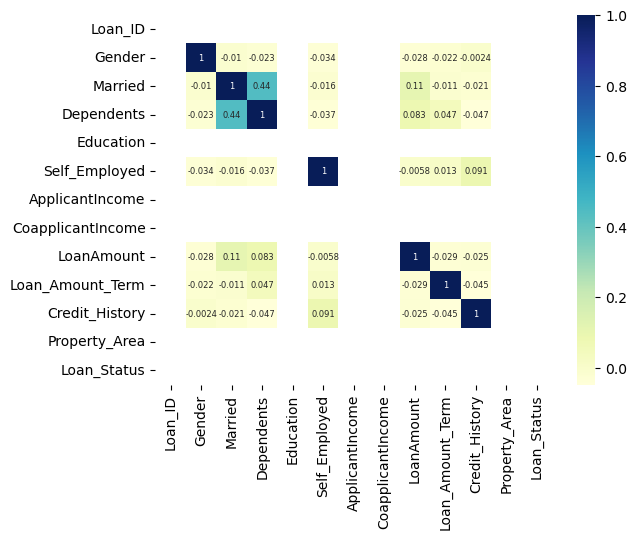%0A)

#### We see a lot of correlated in amount of missing values for Married and Dependent implying creation of missing values for marriage status positively<a
href="#We-see-a-lot-of-correlated-in--amount-of-missing-values-for-Married-and-Dependent-implying-creation-of-missing-values-for-marriage-status-positively"
class="anchor-link">¶</a>

### Finding the correlation of variables<a href="#Finding-the-correlation-of-variables"
class="anchor-link">¶</a>

In \[13\]:

    sns.heatmap(Bootcamp.corr(),cmap='YlGnBu',annot=True,annot_kws={"size":6})

Out\[13\]:

    <AxesSubplot:>

![](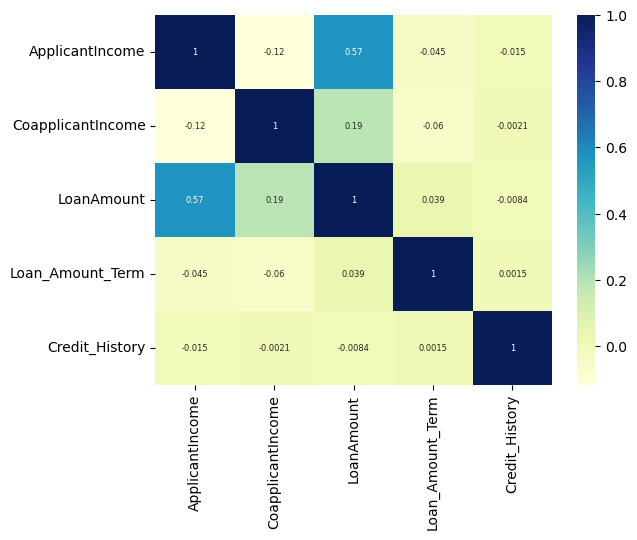%0A)

### We see Loan Amount ans Applicant Income is highly coorelated<a href="#We-see-Loan-Amount-ans-Applicant-Income-is-highly-coorelated"
class="anchor-link">¶</a>

### Calculating Entropy for each predictor in Dataset, Intuititively Entropy is defined as the measure of Impurity of each dataset, Higher entropy implies dataset is more balanced while lower entropy implies dataset is more unbalanced with a class of variables or there is a more purity of that dominating varaiable respectively<a
href="#Calculating-Entropy-for-each-predictor-in-Dataset,-Intuititively-Entropy-is-defined-as-the-measure-of-Impurity-of-each-dataset,-Higher-entropy-implies-dataset-is-more-balanced-while-lower-entropy-implies-dataset-is-more-unbalanced-with-a-class-of-variables-or-there-is-a-more-purity-of-that-dominating-varaiable-respectively"
class="anchor-link">¶</a>

In \[10\]:

    x=Bootcamp.drop(["Credit_History","LoanAmount","Loan_Amount_Term"],axis=1)
    x.dropna(axis=0,inplace=True)
    for i in x.columns:
        H=Bootcamp[i]
        H=np.array(H)
        Counter(H)
        J=[]
        entropy=0
        for j in Counter(H):
            p=Counter(H)[j]
            J==J.append(p)
        for k in J:
            a_k=-(k/len(H))*(math.log(k/len(H),len(J)))
            entropy=entropy+a_k
        print (f"The entropy for {i} is {entropy}")    

    The entropy for Loan_ID is 1.0000000000000002
    The entropy for Gender is 0.521824157615196
    The entropy for Married is 0.6137709299053016
    The entropy for Dependents is 0.7557576132142594
    The entropy for Education is 0.75694266717241
    The entropy for Self_Employed is 0.5371275860545196
    The entropy for ApplicantIncome is 0.9811517564817506
    The entropy for CoapplicantIncome is 0.6685261046939365
    The entropy for Property_Area is 0.9946999272825048
    The entropy for Loan_Status is 0.8962696698442932

#### Note Dependents, Education Application Income , Property Area and Loan Status is balanced since it has a high amount of entropy while Gender, Married Self_Employed CoapplicantIncome has low entropy indicating the following variables in the Datset is more imbalanced respectively<a
href="#Note-Dependents,-Education-Application-Income-,-Property-Area-and-Loan-Status-is-balanced-since-it-has-a-high-amount-of-entropy-while-Gender,-Married-Self_Employed-CoapplicantIncome-has-low-entropy-indicating-the-following-variables-in-the-Datset-is-more-imbalanced-respectively"
class="anchor-link">¶</a>

### Histplot of Applicant Income<a href="#Histplot-of-Applicant-Income" class="anchor-link">¶</a>

In \[14\]:

    hist = plt.hist(x=Bootcamp['ApplicantIncome'],color='yellow', density = True)
    plt.axvline(Bootcamp['ApplicantIncome'].mean(), color = 'red', linestyle='--')
    plt.axvline(Bootcamp['ApplicantIncome'].median(), color = 'black', linestyle='-')

Out\[14\]:

    <matplotlib.lines.Line2D at 0x2440dc778b0>

![](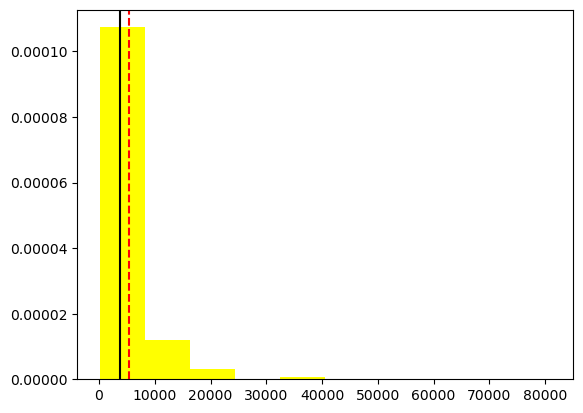%0A)

### Histplot of Coapplicant Income<a href="#Histplot-of-Coapplicant-Income" class="anchor-link">¶</a>

In \[15\]:

    hist = plt.hist(x=Bootcamp['CoapplicantIncome'],color='green', density = True)
    plt.axvline(Bootcamp['CoapplicantIncome'].mean(), color = 'red', linestyle='--')
    plt.axvline(Bootcamp['CoapplicantIncome'].median(), color = 'black', linestyle='-')

Out\[15\]:

    <matplotlib.lines.Line2D at 0x2440dc3e550>

![](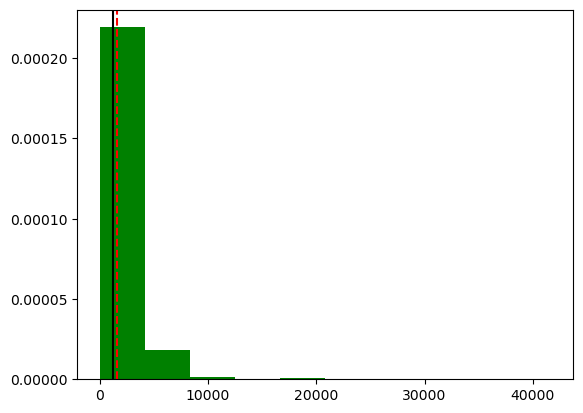%0A)

### Histplot of Loan Amount<a href="#Histplot-of-Loan-Amount" class="anchor-link">¶</a>

In \[18\]:

    hist = plt.hist(x=Bootcamp['LoanAmount'],color='blue', density = True)
    plt.axvline(Bootcamp['LoanAmount'].mean(), color = 'red', linestyle='--')
    plt.axvline(Bootcamp['LoanAmount'].median(), color = 'black', linestyle='-')

Out\[18\]:

    <matplotlib.lines.Line2D at 0x2440dc58820>

![](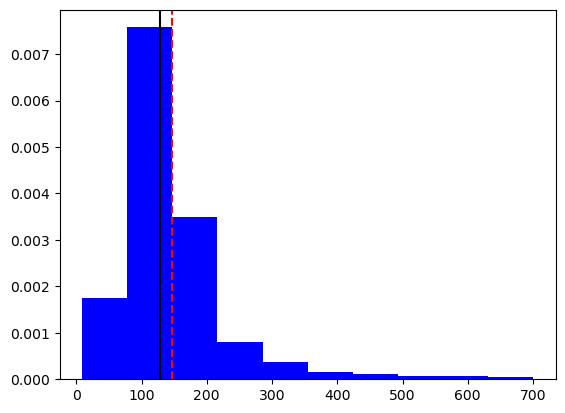%0A)

In \[19\]:

    sns.kdeplot(x='Credit_History',data=Bootcamp)

Out\[19\]:

    <AxesSubplot:xlabel='Credit_History', ylabel='Density'>

![](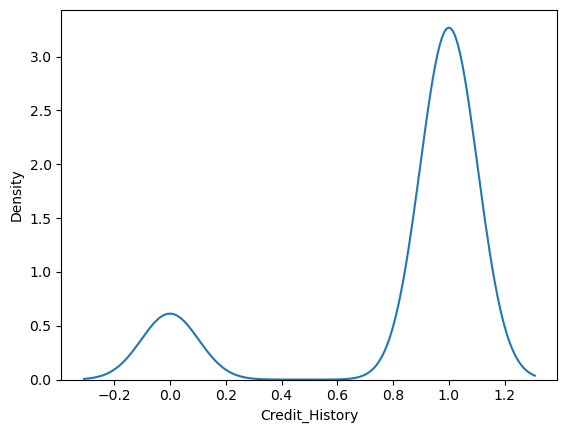%0A)

#### We find from the skewness value and KDE plot since the amount of imbalance of Credit History in dataset i.e people with Credit History of 1 is most in dataset, our entropy is supposedly very low since more purity in Dataset is of CreditHistory 1 respectively<a
href="#We-find-from-the-skewness-value-and-KDE-plot-since-the-amount-of-imbalance-of-Credit-History-in-dataset-i.e-people-with-Credit-History-of-1-is-most-in-dataset,-our-entropy-is-supposedly-very-low-since-more-purity-in-Dataset-is-of-CreditHistory-1-respectively"
class="anchor-link">¶</a>

In \[20\]:

    sns.kdeplot(x='LoanAmount',data=Bootcamp)

Out\[20\]:

    <AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

![](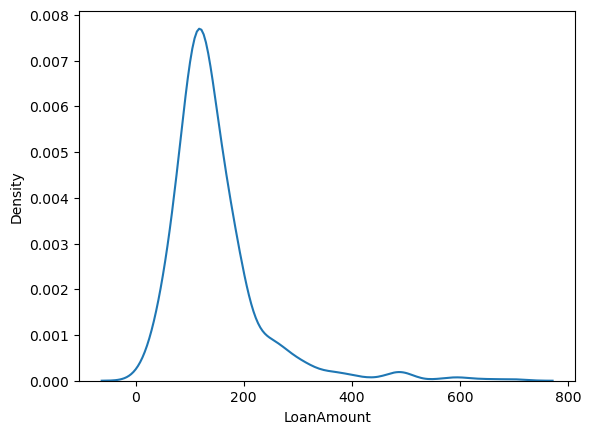%0A)

#### We find from the skewness value and KDE plot since the amount of imbalance of Loan Amount in dataset i.e people with Loan Amount less than 200 is most in dataset, our entropy is supposedly very low since more purity in Dataset is of Loan Amount less than 200 respectively<a
href="#We-find-from-the-skewness-value-and-KDE-plot-since-the-amount-of-imbalance-of-Loan-Amount-in-dataset-i.e-people-with-Loan-Amount-less-than-200-is-most-in-dataset,-our-entropy-is-supposedly-very-low-since-more-purity-in-Dataset-is-of-Loan-Amount-less-than-200-respectively"
class="anchor-link">¶</a>

In \[21\]:

    sns.kdeplot(x='Loan_Amount_Term',data=Bootcamp)

Out\[21\]:

    <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

![](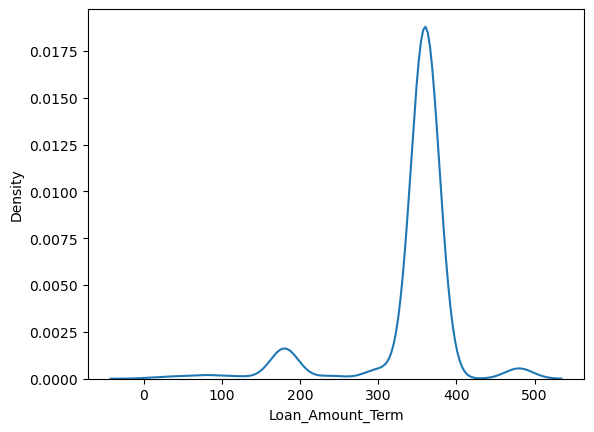%0A)

#### We find from the skewness value and KDE plot since the amount of imbalance of Loan_Amount_term in dataset i.e people with Loan Amount Term =360 that is is most in dataset, our entropy is supposedly very low since more purity in Dataset is of Loan Amount term 360 respectively<a
href="#We-find-from-the-skewness-value-and-KDE-plot-since-the-amount-of-imbalance-of-Loan_Amount_term-in-dataset-i.e-people-with-Loan-Amount-Term-=360-that-is--is-most-in-dataset,-our-entropy-is-supposedly-very-low-since-more-purity-in-Dataset-is-of-Loan-Amount-term-360-respectively"
class="anchor-link">¶</a>

Step 1: g=sns.FacetGrid(col='Our desired hue column
name')--------\>Basically g is a 1\*n array of elemnts in Hue Column
Step 2: g.map(plt.desired Plot, col name) example
g.map(plt.bar,"Loan_Status") Note Instead of normal
plt.bar.DataFrame\["Loan_Status"\] we use the aforementioned input in
the g.map's parantheisis

# Exploratory Data Analysis EDA<a href="#Exploratory-Data-Analysis-EDA" class="anchor-link">¶</a>

In \[22\]:

    g=sns.FacetGrid(Bootcamp,col='Gender')
    g.map(plt.hist,"Loan_Status")

Out\[22\]:

    <seaborn.axisgrid.FacetGrid at 0x2440c4ae430>

![](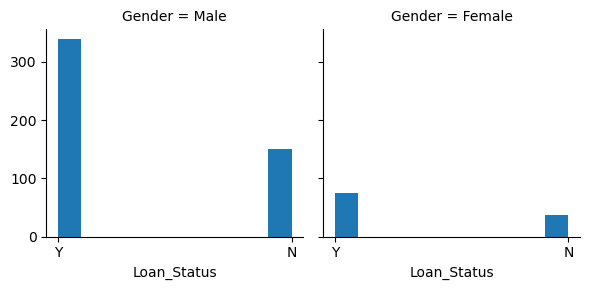%0A)

In \[23\]:

    sns.countplot(x='Gender',data=Bootcamp,hue='Loan_Status')

Out\[23\]:

    <AxesSubplot:xlabel='Gender', ylabel='count'>

![](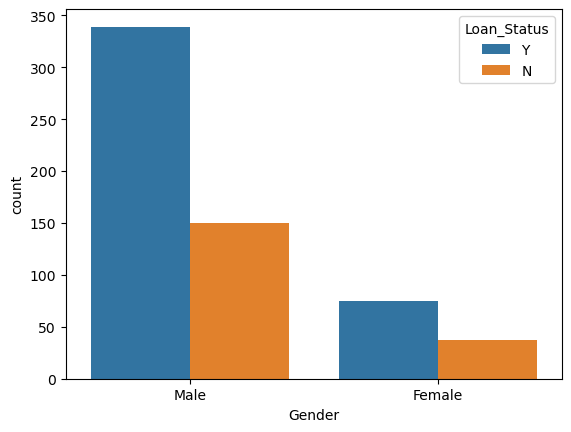%0A)

## Thus Males have a higher record for taking loans than female and loan approval to rejection Ratio for male is more than female respectively<a
href="#Thus-Males-have-a-higher-record-for-taking-loans-than-female-and-loan-approval-to-rejection-Ratio-for-male-is-more-than-female-respectively"
class="anchor-link">¶</a>

In \[24\]:

    g=sns.FacetGrid(Bootcamp,col='Credit_History')
    g.map(plt.hist,"Loan_Status")

Out\[24\]:

    <seaborn.axisgrid.FacetGrid at 0x2440db530d0>

![](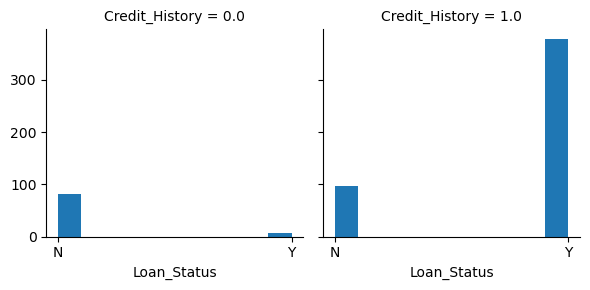%0A)

In \[25\]:

    sns.countplot(x='Credit_History',data=Bootcamp,hue='Loan_Status')

Out\[25\]:

    <AxesSubplot:xlabel='Credit_History', ylabel='count'>

![](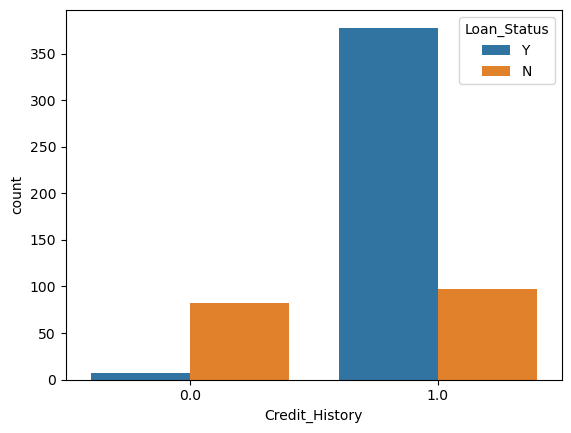%0A)

In \[26\]:

    g=sns.FacetGrid(Bootcamp,col='Property_Area')
    g.map(plt.hist,"Loan_Status")

Out\[26\]:

    <seaborn.axisgrid.FacetGrid at 0x2440b57f130>

![](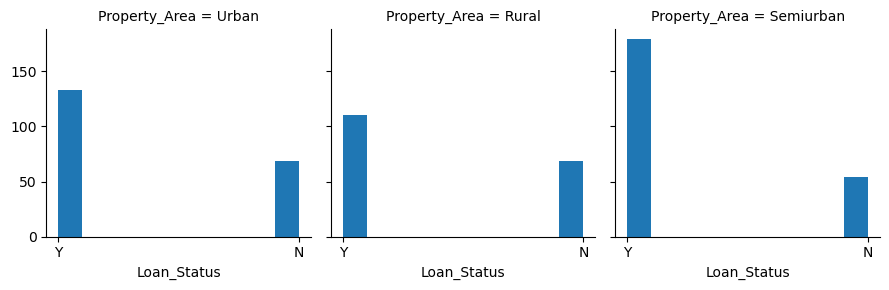%0A)

## Semi Urbans have a higher requirement in terms of Loan Access respectively<a
href="#Semi-Urbans-have-a-higher-requirement-in-terms-of-Loan-Access-respectively"
class="anchor-link">¶</a>

In \[27\]:

    sns.countplot(x='Property_Area',data=Bootcamp,hue='Loan_Status')

Out\[27\]:

    <AxesSubplot:xlabel='Property_Area', ylabel='count'>

![](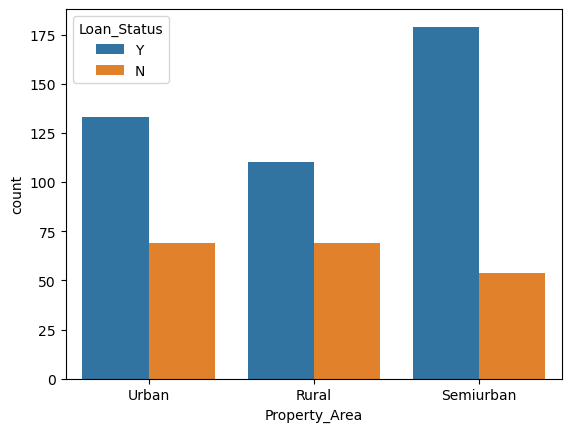%0A)

## if one calculates the yes to ratio for every column in the property area one can easily see people Living in the Semi Urban Areas had greater chances of Loan Approval than people living in both Urban and Rural Areas respectively<a
href="#if-one-calculates-the-yes-to-ratio-for-every-column-in-the-property-area-one-can-easily-see-people-Living-in-the-Semi-Urban-Areas-had-greater-chances-of-Loan-Approval-than-people-living-in-both-Urban-and-Rural-Areas-respectively"
class="anchor-link">¶</a>

In \[28\]:

    g=sns.FacetGrid(Bootcamp,col='Self_Employed')
    g.map(plt.hist,"Loan_Status")

Out\[28\]:

    <seaborn.axisgrid.FacetGrid at 0x2440c325a00>

![](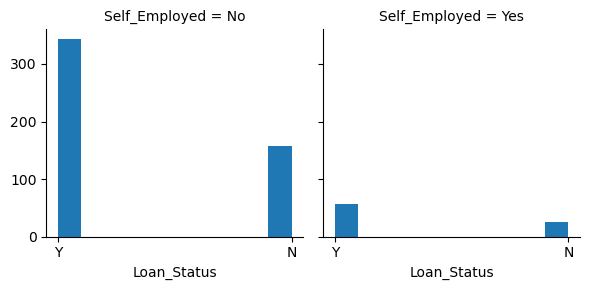%0A)

In \[29\]:

    sns.countplot(x='Self_Employed',data=Bootcamp,hue='Loan_Status')

Out\[29\]:

    <AxesSubplot:xlabel='Self_Employed', ylabel='count'>

![](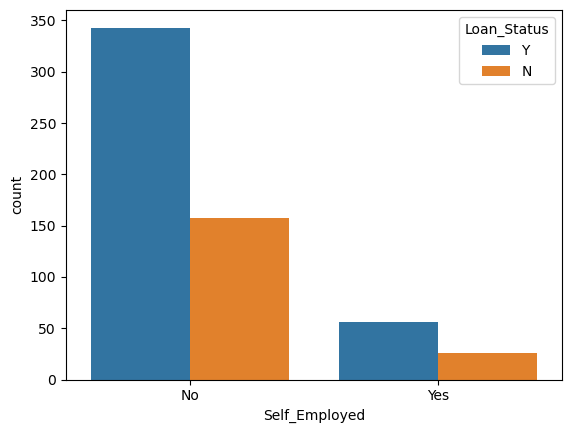%0A)

## People who are not self employed takes higher loan than people who are<a
href="#People-who-are-not-self-employed-takes-higher-loan-than-people-who-are"
class="anchor-link">¶</a>

In \[30\]:

    g=sns.FacetGrid(Bootcamp,col='Education')
    g.map(plt.hist,"Loan_Status")

Out\[30\]:

    <seaborn.axisgrid.FacetGrid at 0x2440ba68910>

![](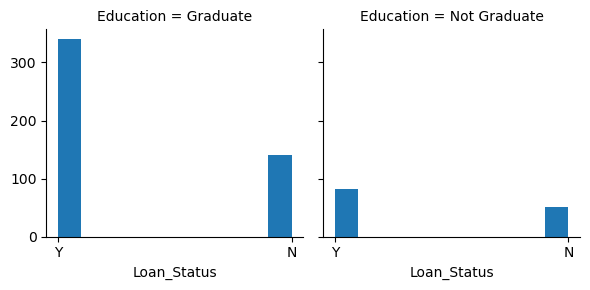%0A)

## Again it is visible that Graduates take up more loan than not graduates respectively<a
href="#Again-it-is-visible-that-Graduates-take-up-more-loan-than-not-graduates-respectively"
class="anchor-link">¶</a>

In \[31\]:

    sns.countplot(x='Education',data=Bootcamp,hue='Loan_Status')

Out\[31\]:

    <AxesSubplot:xlabel='Education', ylabel='count'>

![](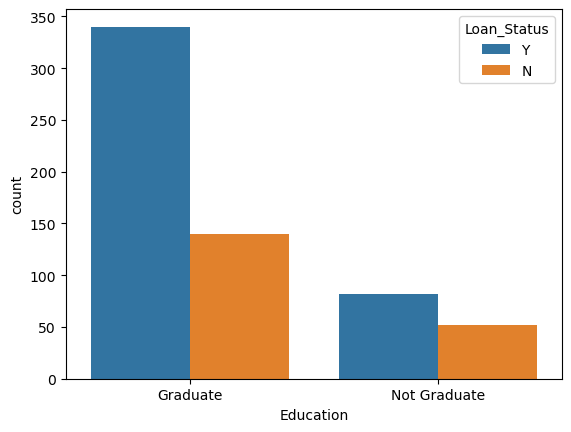%0A)

## As one can see Graduates has greater loan approval than non graduates indicating their ability to pay back by earning a job in future respectively<a
href="#As-one-can-see-Graduates-has-greater-loan-approval-than-non-graduates-indicating-their-ability-to-pay-back-by-earning-a-job-in-future-respectively"
class="anchor-link">¶</a>

In \[32\]:

    g=sns.FacetGrid(Bootcamp,col='Married')
    g.map(plt.hist,"Loan_Status")

Out\[32\]:

    <seaborn.axisgrid.FacetGrid at 0x2440882ed00>

![](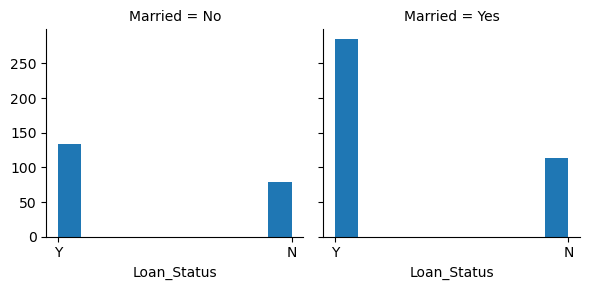%0A)

## People who are married takes higher loan than people who are not<a
href="#People-who-are-married-takes-higher-loan-than-people-who-are-not"
class="anchor-link">¶</a>

In \[33\]:

    sns.countplot(x='Married',data=Bootcamp,hue='Loan_Status')

Out\[33\]:

    <AxesSubplot:xlabel='Married', ylabel='count'>

![](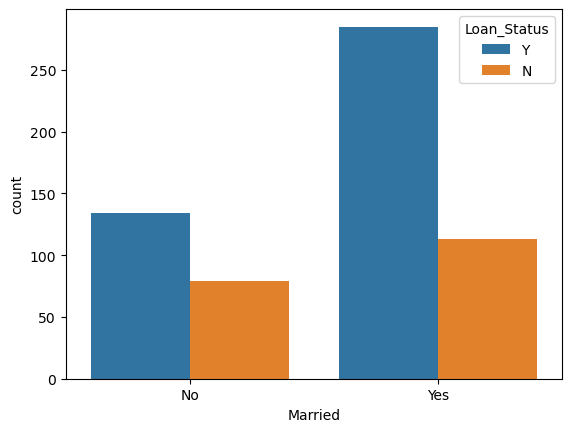%0A)

## One can see People who are married have a higher probability of Loan Approval<a
href="#One-can-see-People-who-are-married-have-a-higher-probability-of-Loan-Approval"
class="anchor-link">¶</a>

In \[34\]:

    g=sns.FacetGrid(Bootcamp,col='Dependents')
    g.map(plt.hist,"Loan_Status")

Out\[34\]:

    <seaborn.axisgrid.FacetGrid at 0x244090d0160>

![](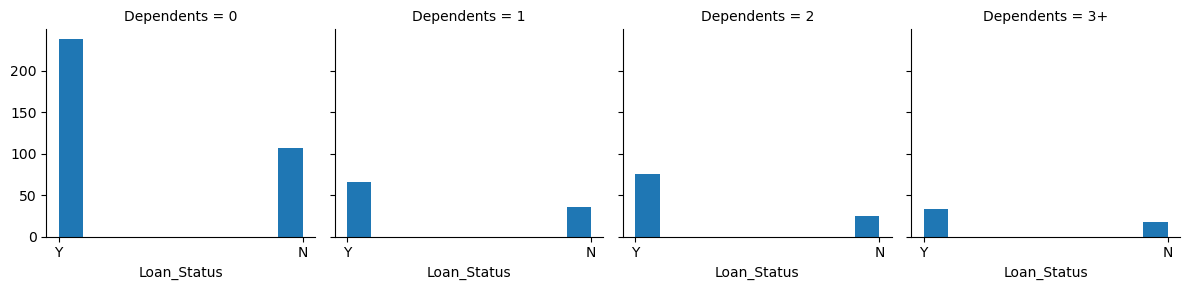%0A)

## People who have one or more than one dependent has a lower demand for Loan<a
href="#People-who-have-one-or-more-than-one-dependent-has-a-lower-demand-for-Loan"
class="anchor-link">¶</a>

In \[35\]:

    sns.countplot(x='Dependents',data=Bootcamp,hue='Loan_Status')

Out\[35\]:

    <AxesSubplot:xlabel='Dependents', ylabel='count'>

![](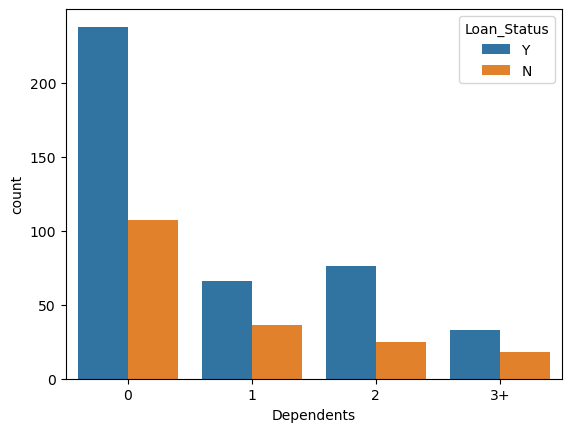%0A)

#### People who have low Dependents has a higher probaility of Loan Approval respectively<a
href="#People-who-have-low-Dependents-has-a-higher-probaility-of-Loan-Approval-respectively"
class="anchor-link">¶</a>

In \[36\]:

    # Dropping Loan_ID since it won't help us in Calculation
    Bootcamp.drop('Loan_ID',axis=1,inplace=True)

In \[37\]:

    sns.kdeplot(x="ApplicantIncome",data=Bootcamp,hue="Loan_Status")

Out\[37\]:

    <AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

![](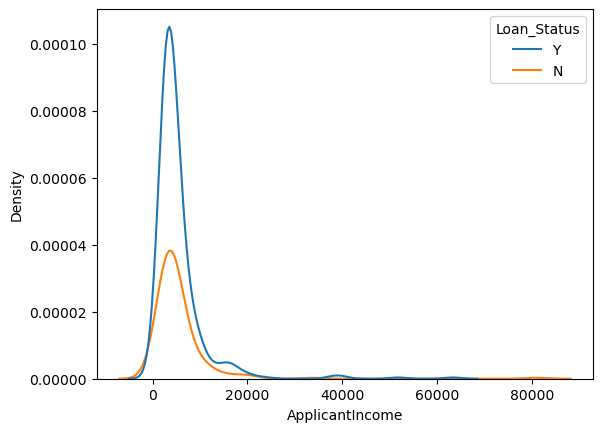%0A)

#### The maximum Amount of Applicant Income lies between 0 and 20,000 and there is a greater proportion of people between 0 and 20,000 who have received Loan Approval than people with ApplicantIncome in the same range who haven't<a
href="#The-maximum-Amount-of-Applicant-Income-lies-between-0-and-20,000-and-there-is-a-greater-proportion-of-people-between-0-and-20,000-who-have-received-Loan-Approval-than-people-with-ApplicantIncome-in-the-same-range-who-haven&#39;t"
class="anchor-link">¶</a>

In \[38\]:

    sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=Bootcamp)

Out\[38\]:

    <AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

![](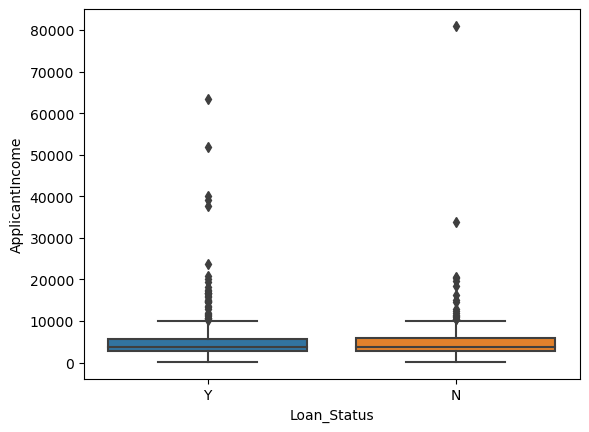%0A)

#### Boxplot of Applicant Income classified on the basis of Loan Status<a
href="#Boxplot-of-Applicant-Income-classified-on-the-basis-of-Loan-Status"
class="anchor-link">¶</a>

In \[39\]:

    sns.kdeplot(x="CoapplicantIncome",data=Bootcamp,hue="Loan_Status")

Out\[39\]:

    <AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

![](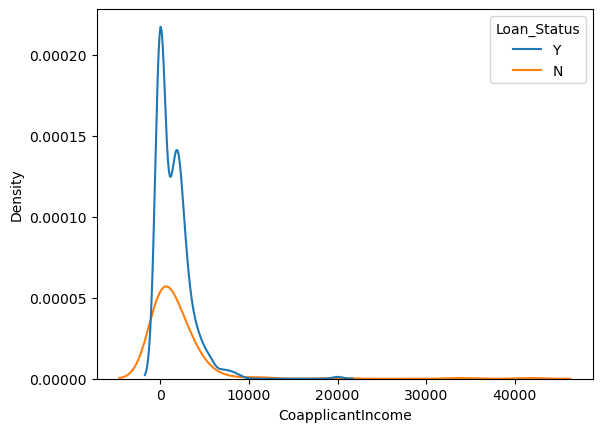%0A)

#### The maximum Amount of CoApplicant Income lies between 0 and 10,000 and there is a greater proportion of people between 0 and 10,000 who have received Loan Approval than people with CoApplicantIncome in the same range who haven't<a
href="#The-maximum-Amount-of-CoApplicant-Income-lies-between-0-and-10,000-and-there-is-a-greater-proportion-of-people-between-0-and-10,000-who-have-received-Loan-Approval-than-people-with-CoApplicantIncome-in-the-same-range-who-haven&#39;t"
class="anchor-link">¶</a>

In \[40\]:

    sns.boxplot(x='Loan_Status',y='CoapplicantIncome',data=Bootcamp,hue="Loan_Status")

Out\[40\]:

    <AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

![](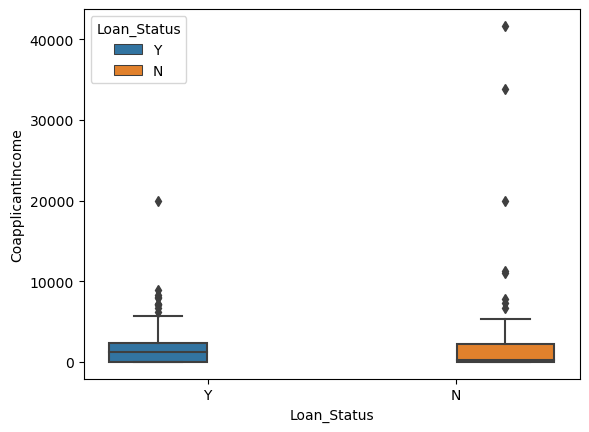%0A)

#### From the Boxplot above it is evident that Median Coapplicant Income of people receiving Loan Rejection is lower than people acccepted for it<a
href="#From-the-Boxplot-above-it-is-evident-that-Median-Coapplicant-Income-of-people-receiving-Loan-Rejection-is-lower-than-people-acccepted-for-it"
class="anchor-link">¶</a>

In \[41\]:

    sns.kdeplot(x="LoanAmount",data=Bootcamp,hue="Loan_Status")

Out\[41\]:

    <AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

![](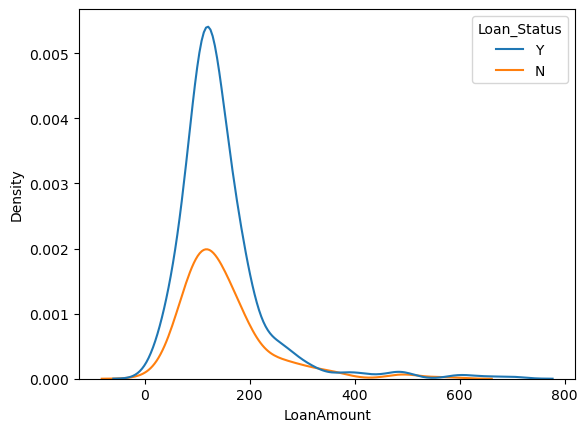%0A)

#### The maximum proportion of people who needs Loan Amount lies between 0 and 200 who have received Loan Approval than people in the same range with Loan Amount who haven't<a
href="#The-maximum-proportion-of-people-who-needs-Loan-Amount-lies-between-0-and-200-who-have-received-Loan-Approval-than-people-in-the-same-range-with-Loan-Amount-who-haven&#39;t"
class="anchor-link">¶</a>

In \[42\]:

    sns.boxplot(x="Loan_Status",y="LoanAmount",data=Bootcamp)

Out\[42\]:

    <AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

![](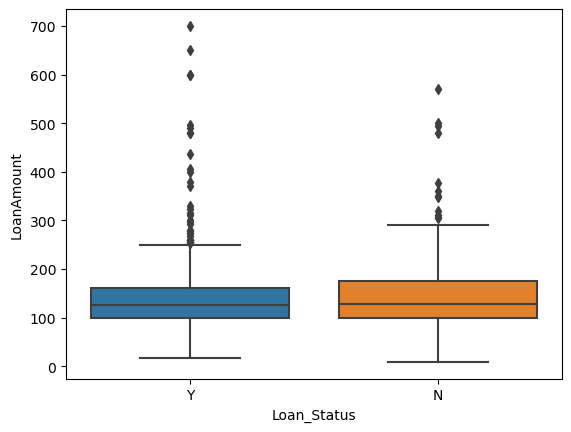%0A)

#### Boxplot of Loan Status with Yes and No column<a href="#Boxplot-of-Loan-Status-with-Yes-and-No-column"
class="anchor-link">¶</a>

In \[43\]:

    sns.kdeplot(x="Loan_Amount_Term",data=Bootcamp,hue="Loan_Status")

Out\[43\]:

    <AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

![](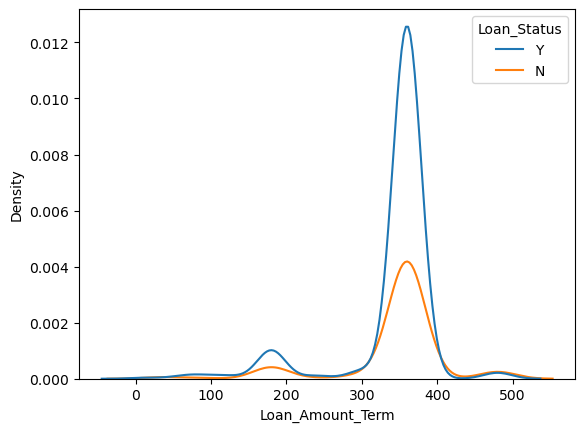%0A)

### Most of the loan amount term lies on 360 range and as again , the Loan approved density is more than the Loan Rejection respectively<a
href="#Most-of-the-loan-amount-term-lies-on-360-range-and-as-again-,-the-Loan-approved-density-is-more-than-the-Loan-Rejection-respectively"
class="anchor-link">¶</a>

In \[44\]:

    sns.barplot(x="Married",y='CoapplicantIncome',data=Bootcamp,hue="Loan_Status")

Out\[44\]:

    <AxesSubplot:xlabel='Married', ylabel='CoapplicantIncome'>

![](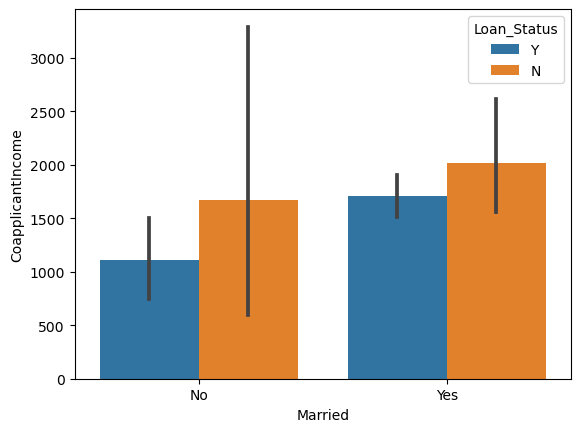%0A)

### Peole who are married have a higher amount of Average CoApplicant Income<a
href="#Peole-who-are-married-have-a-higher-amount-of-Average-CoApplicant-Income"
class="anchor-link">¶</a>

### However the most interesting thing is people married or Unmarried has a greater chance of Loan Rejection if their CoApplicant Income is high<a
href="#However-the-most-interesting-thing-is-people-married-or-Unmarried-has-a-greater-chance-of-Loan-Rejection-if-their-CoApplicant-Income-is-high"
class="anchor-link">¶</a>

In \[45\]:

    sns.histplot(x='CoapplicantIncome',data=Bootcamp,hue="Married")

Out\[45\]:

    <AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

![](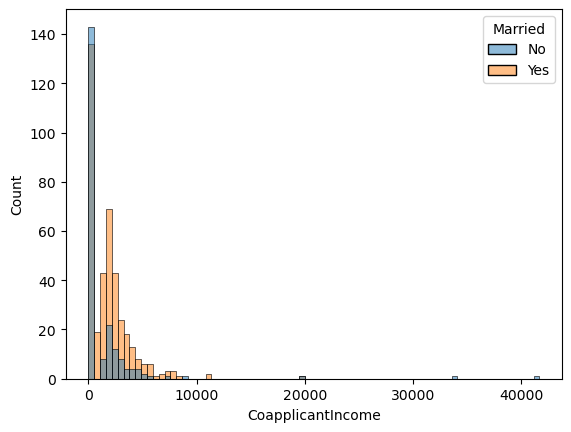%0A)

#### Though eventually unmarried people has higher amount of CoApplicant Income when CoApplicant Income is small, again people who are married have higher amount of Coapplicant Income than people who are not as the CoApplicant Income grows respectively<a
href="#Though-eventually-unmarried-people-has-higher-amount-of-CoApplicant-Income-when-CoApplicant-Income-is-small,-again-people-who-are-married-have-higher-amount-of-Coapplicant-Income-than-people-who-are-not-as-the-CoApplicant-Income-grows-respectively"
class="anchor-link">¶</a>

In \[46\]:

    sns.barplot(x='Married',y="CoapplicantIncome",data=Bootcamp,hue='Credit_History')

Out\[46\]:

    <AxesSubplot:xlabel='Married', ylabel='CoapplicantIncome'>

![](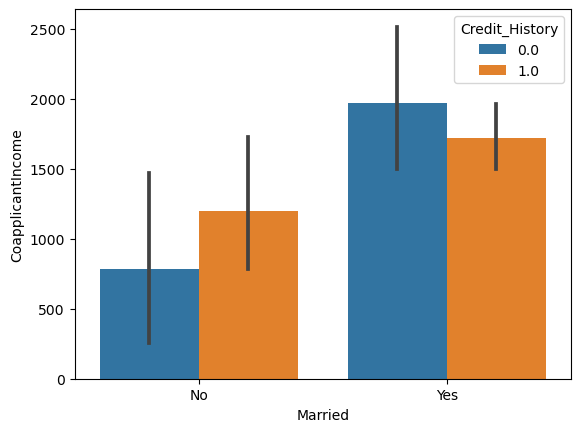%0A)

### as one can see a person who is married, with a bad credit score has higher CoApplicant Income while with people with a good credit score has a lower CoApplicant Income , something that might be a little counterintuitive but it might imply If Individuals have a bad credit score their wives must have Good Annual Income to pay it off when a default happens<a
href="#as-one-can-see-a-person-who-is-married,-with-a-bad-credit-score-has-higher-CoApplicant-Income-while-with-people-with-a-good-credit-score-has-a-lower-CoApplicant-Income-,-something-that-might-be-a-little-counterintuitive-but-it-might-imply-If-Individuals-have-a-bad-credit-score-their-wives-must-have-Good-Annual-Income-to-pay-it-off-when-a-default-happens"
class="anchor-link">¶</a>

"One can see the first of the three graph above that peole who are
married have a higher amount of Average CoApplicant Income he-nce have a
higher probability of Loan Approval"

In \[47\]:

    # to check datatypes DataFrame.dtypes
    Bootcamp.dtypes

Out\[47\]:

    Gender                object
    Married               object
    Dependents            object
    Education             object
    Self_Employed         object
    ApplicantIncome        int64
    CoapplicantIncome    float64
    LoanAmount           float64
    Loan_Amount_Term     float64
    Credit_History       float64
    Property_Area         object
    Loan_Status           object
    dtype: object

# Data Preprocessing<a href="#Data-Preprocessing" class="anchor-link">¶</a>

## Creating Dummies for categorical variables<a href="#Creating-Dummies-for-categorical-variables"
class="anchor-link">¶</a>

In \[48\]:

    Dumm=pd.get_dummies(Bootcamp[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']])

In \[49\]:

    Bootcamp=Dumm.join(Bootcamp)

In \[50\]:

    # Dropping the Categorical Variables
    Bootcamp.drop(['Gender','Married','Dependents','Education','Self_Employed','Property_Area'],axis=1,inplace=True)

## Imputation of missing values<a href="#Imputation-of-missing-values" class="anchor-link">¶</a>

#### Since Credit_History is categorical in nature , we impute it with the mode<a
href="#Since-Credit_History-is-categorical-in-nature-,-we-impute-it-with-the-mode"
class="anchor-link">¶</a>

In \[51\]:

    Loan=SimpleImputer(strategy='most_frequent')

In \[52\]:

    Credit_History=pd.DataFrame(Loan.fit_transform(Bootcamp[['Credit_History']]))

In \[53\]:

    Bootcamp.drop('Credit_History',axis=1,inplace=True)

In \[54\]:

    Bootcamp=Bootcamp.join(Credit_History)

In \[55\]:

    Bootcamp=Bootcamp.rename(columns={0:"Credit_History"})

In \[56\]:

    Bootcamp

Out\[56\]:

|     | Gender_Female | Gender_Male | Married_No | Married_Yes | Dependents_0 | Dependents_1 | Dependents_2 | Dependents_3+ | Education_Graduate | Education_Not Graduate | ... | Self_Employed_Yes | Property_Area_Rural | Property_Area_Semiurban | Property_Area_Urban | ApplicantIncome | CoapplicantIncome | LoanAmount | Loan_Amount_Term | Loan_Status | Credit_History |
|-----|---------------|-------------|------------|-------------|--------------|--------------|--------------|---------------|--------------------|------------------------|-----|-------------------|---------------------|-------------------------|---------------------|-----------------|-------------------|------------|------------------|-------------|----------------|
| 0   | 0             | 1           | 1          | 0           | 1            | 0            | 0            | 0             | 1                  | 0                      | ... | 0                 | 0                   | 0                       | 1                   | 5849            | 0.0               | NaN        | 360.0            | Y           | 1.0            |
| 1   | 0             | 1           | 0          | 1           | 0            | 1            | 0            | 0             | 1                  | 0                      | ... | 0                 | 1                   | 0                       | 0                   | 4583            | 1508.0            | 128.0      | 360.0            | N           | 1.0            |
| 2   | 0             | 1           | 0          | 1           | 1            | 0            | 0            | 0             | 1                  | 0                      | ... | 1                 | 0                   | 0                       | 1                   | 3000            | 0.0               | 66.0       | 360.0            | Y           | 1.0            |
| 3   | 0             | 1           | 0          | 1           | 1            | 0            | 0            | 0             | 0                  | 1                      | ... | 0                 | 0                   | 0                       | 1                   | 2583            | 2358.0            | 120.0      | 360.0            | Y           | 1.0            |
| 4   | 0             | 1           | 1          | 0           | 1            | 0            | 0            | 0             | 1                  | 0                      | ... | 0                 | 0                   | 0                       | 1                   | 6000            | 0.0               | 141.0      | 360.0            | Y           | 1.0            |
| ... | ...           | ...         | ...        | ...         | ...          | ...          | ...          | ...           | ...                | ...                    | ... | ...               | ...                 | ...                     | ...                 | ...             | ...               | ...        | ...              | ...         | ...            |
| 609 | 1             | 0           | 1          | 0           | 1            | 0            | 0            | 0             | 1                  | 0                      | ... | 0                 | 1                   | 0                       | 0                   | 2900            | 0.0               | 71.0       | 360.0            | Y           | 1.0            |
| 610 | 0             | 1           | 0          | 1           | 0            | 0            | 0            | 1             | 1                  | 0                      | ... | 0                 | 1                   | 0                       | 0                   | 4106            | 0.0               | 40.0       | 180.0            | Y           | 1.0            |
| 611 | 0             | 1           | 0          | 1           | 0            | 1            | 0            | 0             | 1                  | 0                      | ... | 0                 | 0                   | 0                       | 1                   | 8072            | 240.0             | 253.0      | 360.0            | Y           | 1.0            |
| 612 | 0             | 1           | 0          | 1           | 0            | 0            | 1            | 0             | 1                  | 0                      | ... | 0                 | 0                   | 0                       | 1                   | 7583            | 0.0               | 187.0      | 360.0            | Y           | 1.0            |
| 613 | 1             | 0           | 1          | 0           | 1            | 0            | 0            | 0             | 1                  | 0                      | ... | 1                 | 0                   | 1                       | 0                   | 4583            | 0.0               | 133.0      | 360.0            | N           | 0.0            |

614 rows × 21 columns

#### Since Loan_Amount_Term has only 10 unique variables spread over the datset, we assume it is categorical<a
href="#Since-Loan_Amount_Term-has-only-10-unique-variables-spread-over-the-datset,-we-assume-it-is-categorical"
class="anchor-link">¶</a>

### Getting Dummies for Loan_Amount_Term<a href="#Getting-Dummies-for-Loan_Amount_Term"
class="anchor-link">¶</a>

In \[57\]:

    Loan=pd.get_dummies(Bootcamp['Loan_Amount_Term'])

In \[58\]:

    # Renaming Column Names of Loan_Amount_Term
    for i in Loan.columns:
        Loan=Loan.rename(columns={i:"Loan Term is " + str(i)})

In \[59\]:

    Bootcamp=Bootcamp.join(Loan)

In \[60\]:

    Bootcamp.drop('Loan_Amount_Term',axis=1,inplace=True)

### Since LoanAmount has almost equal mean and median, we impute it by the simple mean respectively<a
href="#Since-LoanAmount-has-almost-equal-mean-and-median,-we-impute-it-by-the-simple-mean-respectively"
class="anchor-link">¶</a>

In \[61\]:

    Loan=SimpleImputer()

In \[62\]:

    LoanAmount=pd.DataFrame(Loan.fit_transform(Bootcamp[['LoanAmount']]))

In \[63\]:

    Bootcamp.drop('LoanAmount',axis=1,inplace=True)

In \[64\]:

    Bootcamp=Bootcamp.join(LoanAmount)

In \[65\]:

    Bootcamp=Bootcamp.rename(columns={0:"LoanAmount"})

In \[66\]:

    Bootcamp.isna().sum()

Out\[66\]:

    Gender_Female              0
    Gender_Male                0
    Married_No                 0
    Married_Yes                0
    Dependents_0               0
    Dependents_1               0
    Dependents_2               0
    Dependents_3+              0
    Education_Graduate         0
    Education_Not Graduate     0
    Self_Employed_No           0
    Self_Employed_Yes          0
    Property_Area_Rural        0
    Property_Area_Semiurban    0
    Property_Area_Urban        0
    ApplicantIncome            0
    CoapplicantIncome          0
    Loan_Status                0
    Credit_History             0
    Loan Term is 12.0          0
    Loan Term is 36.0          0
    Loan Term is 60.0          0
    Loan Term is 84.0          0
    Loan Term is 120.0         0
    Loan Term is 180.0         0
    Loan Term is 240.0         0
    Loan Term is 300.0         0
    Loan Term is 360.0         0
    Loan Term is 480.0         0
    LoanAmount                 0
    dtype: int64

In \[67\]:

    X=Bootcamp.drop("Loan_Status",axis=1)

In \[68\]:

    Bootcamp["Loan_Status"]

Out\[68\]:

    0      Y
    1      N
    2      Y
    3      Y
    4      Y
          ..
    609    Y
    610    Y
    611    Y
    612    Y
    613    N
    Name: Loan_Status, Length: 614, dtype: object

### Final Dataset<a href="#Final-Dataset" class="anchor-link">¶</a>

In \[69\]:

    Bootcamp

Out\[69\]:

|     | Gender_Female | Gender_Male | Married_No | Married_Yes | Dependents_0 | Dependents_1 | Dependents_2 | Dependents_3+ | Education_Graduate | Education_Not Graduate | ... | Loan Term is 36.0 | Loan Term is 60.0 | Loan Term is 84.0 | Loan Term is 120.0 | Loan Term is 180.0 | Loan Term is 240.0 | Loan Term is 300.0 | Loan Term is 360.0 | Loan Term is 480.0 | LoanAmount |
|-----|---------------|-------------|------------|-------------|--------------|--------------|--------------|---------------|--------------------|------------------------|-----|-------------------|-------------------|-------------------|--------------------|--------------------|--------------------|--------------------|--------------------|--------------------|------------|
| 0   | 0             | 1           | 1          | 0           | 1            | 0            | 0            | 0             | 1                  | 0                      | ... | 0                 | 0                 | 0                 | 0                  | 0                  | 0                  | 0                  | 1                  | 0                  | 146.412162 |
| 1   | 0             | 1           | 0          | 1           | 0            | 1            | 0            | 0             | 1                  | 0                      | ... | 0                 | 0                 | 0                 | 0                  | 0                  | 0                  | 0                  | 1                  | 0                  | 128.000000 |
| 2   | 0             | 1           | 0          | 1           | 1            | 0            | 0            | 0             | 1                  | 0                      | ... | 0                 | 0                 | 0                 | 0                  | 0                  | 0                  | 0                  | 1                  | 0                  | 66.000000  |
| 3   | 0             | 1           | 0          | 1           | 1            | 0            | 0            | 0             | 0                  | 1                      | ... | 0                 | 0                 | 0                 | 0                  | 0                  | 0                  | 0                  | 1                  | 0                  | 120.000000 |
| 4   | 0             | 1           | 1          | 0           | 1            | 0            | 0            | 0             | 1                  | 0                      | ... | 0                 | 0                 | 0                 | 0                  | 0                  | 0                  | 0                  | 1                  | 0                  | 141.000000 |
| ... | ...           | ...         | ...        | ...         | ...          | ...          | ...          | ...           | ...                | ...                    | ... | ...               | ...               | ...               | ...                | ...                | ...                | ...                | ...                | ...                | ...        |
| 609 | 1             | 0           | 1          | 0           | 1            | 0            | 0            | 0             | 1                  | 0                      | ... | 0                 | 0                 | 0                 | 0                  | 0                  | 0                  | 0                  | 1                  | 0                  | 71.000000  |
| 610 | 0             | 1           | 0          | 1           | 0            | 0            | 0            | 1             | 1                  | 0                      | ... | 0                 | 0                 | 0                 | 0                  | 1                  | 0                  | 0                  | 0                  | 0                  | 40.000000  |
| 611 | 0             | 1           | 0          | 1           | 0            | 1            | 0            | 0             | 1                  | 0                      | ... | 0                 | 0                 | 0                 | 0                  | 0                  | 0                  | 0                  | 1                  | 0                  | 253.000000 |
| 612 | 0             | 1           | 0          | 1           | 0            | 0            | 1            | 0             | 1                  | 0                      | ... | 0                 | 0                 | 0                 | 0                  | 0                  | 0                  | 0                  | 1                  | 0                  | 187.000000 |
| 613 | 1             | 0           | 1          | 0           | 1            | 0            | 0            | 0             | 1                  | 0                      | ... | 0                 | 0                 | 0                 | 0                  | 0                  | 0                  | 0                  | 1                  | 0                  | 133.000000 |

614 rows × 30 columns

# Classification Exercise<a href="#Classification-Exercise" class="anchor-link">¶</a>

### Specifying the X matrix or the predictor space or our features<a
href="#Specifying-the-X-matrix-or-the-predictor-space-or-our-features"
class="anchor-link">¶</a>

In \[70\]:

    X=Bootcamp.drop("Loan_Status",axis=1)

### Specifying the Y matrix or our output dichotomous variable<a href="#Specifying-the-Y-matrix-or-our-output-dichotomous-variable"
class="anchor-link">¶</a>

In \[71\]:

    y=Bootcamp['Loan_Status']

#### Creating our y to 0 or 1<a href="#Creating-our-y-to-0-or-1" class="anchor-link">¶</a>

In \[72\]:

    class_mapping = {'N': 0, 'Y': 1}
    y = np.array([class_mapping[label] for label in y])

### Here we make the train test split and allocate 20% of our data to test set and 80% of our data to training set respectively<a
href="#Here-we-make-the-train-test-split-and-allocate-20%25-of-our-data-to-test-set-and-80%25-of-our-data-to-training-set-respectively"
class="anchor-link">¶</a>

In \[73\]:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

###### Checking balance of our output space<a href="#Checking-balance-of-our-output-space"
class="anchor-link">¶</a>

In \[74\]:

    sns.countplot(y_train)

Out\[74\]:

    <AxesSubplot:ylabel='count'>

![](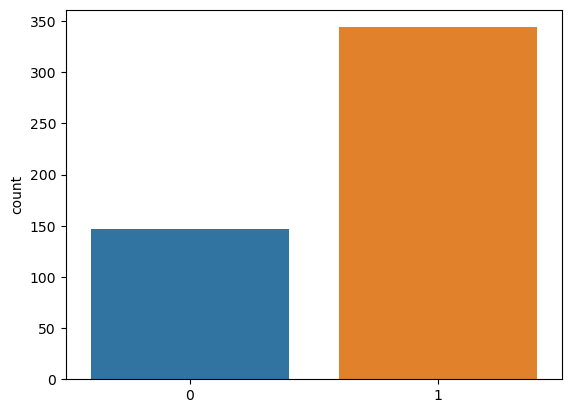%0A)

### Since the training dataset is heavily imbalanced towards Loan Status of Yes, we use the concept of SMOTE to create more samples of our Loan Status No respectively<a
href="#Since-the-training-dataset-is-heavily-imbalanced-towards-Loan-Status-of-Yes,-we-use-the-concept-of-SMOTE-to-create-more-samples-of-our-Loan-Status-No-respectively"
class="anchor-link">¶</a>

In \[75\]:

    Loan=SMOTE(k_neighbors=5)

In \[76\]:

    X_train,y_train=Loan.fit_resample(X_train,y_train)

In \[77\]:

    sns.histplot(y_train)

Out\[77\]:

    <AxesSubplot:ylabel='Count'>

![](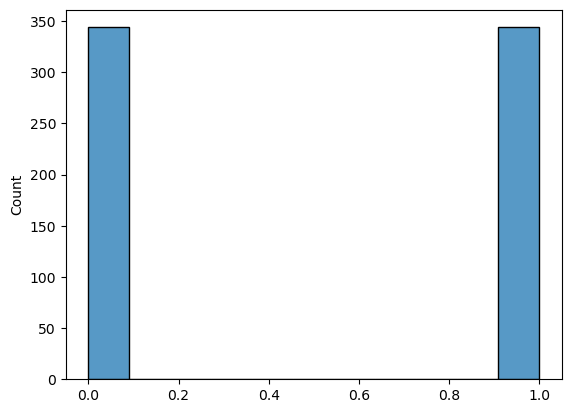%0A)

## Logistic Regression<a href="#Logistic-Regression" class="anchor-link">¶</a>

### Grid Search for best parameter search<a href="#Grid-Search-for-best-parameter-search"
class="anchor-link">¶</a>

In \[73\]:

    #Defining our learning rate . Here l1 means lasso while l2 means ridge regression
    param_grid={"penalty":["l1","l2"],"C":[0.1,1,10]}

In \[74\]:

    #Doing our Grid Search
    logit=GridSearchCV(LogisticRegression(),param_grid,cv=5,scoring="accuracy")

In \[75\]:

    #Fitting our Grid Search model with Training Data Set
    logit.fit(X_train,y_train)

Out\[75\]:

    GridSearchCV(cv=5, estimator=LogisticRegression(),
                 param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
                 scoring='accuracy')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=5, estimator=LogisticRegression(),
                 param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
                 scoring='accuracy')

estimator: LogisticRegression

    LogisticRegression()

LogisticRegression

    LogisticRegression()

In \[76\]:

    #Finding our best parameter
    logit.best_params_

Out\[76\]:

    {'C': 10, 'penalty': 'l2'}

In \[77\]:

    #Creating our Logistic Regression Model with the best parameters
    FinalLog=LogisticRegression(penalty=logit.best_params_["penalty"],C=logit.best_params_["C"])

In \[78\]:

    #Fitting our training dataset with it
    FinalLog.fit(X_train,y_train)

Out\[78\]:

    LogisticRegression(C=10)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

LogisticRegression

    LogisticRegression(C=10)

In \[79\]:

    #Predicting our test dataset with it
    TunedLog=FinalLog.predict(X_test)

In \[80\]:

    #printing the confusion matrix
    cm=confusion_matrix(y_test,TunedLog)

In \[81\]:

    #Confusion Matrix display
    cm=ConfusionMatrixDisplay(cm)
    cm.plot()

Out\[81\]:

    <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x172c6f3b580>

![](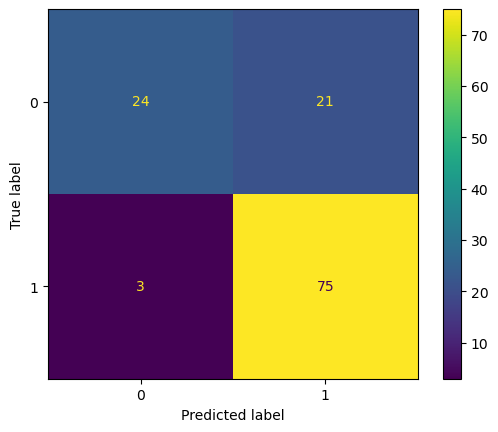%0A)

In \[82\]:

    #printing classification report 
    print (classification_report(y_test,TunedLog))

                  precision    recall  f1-score   support

               0       0.89      0.53      0.67        45
               1       0.78      0.96      0.86        78

        accuracy                           0.80       123
       macro avg       0.84      0.75      0.76       123
    weighted avg       0.82      0.80      0.79       123

In \[83\]:

    #printing Accuracy Score
    print( f"the accuracy score for test data set is {accuracy_score(y_test,TunedLog)}")

    the accuracy score for test data set is 0.8048780487804879

In \[84\]:

    # Finding our detailed Accuracy Score of both training and data
    TrainedLog=FinalLog.predict(X_train)

In \[85\]:

    #printing classification report with of Training Data
    print (classification_report(y_train,TrainedLog))

                  precision    recall  f1-score   support

               0       0.92      0.73      0.81       344
               1       0.77      0.93      0.85       344

        accuracy                           0.83       688
       macro avg       0.84      0.83      0.83       688
    weighted avg       0.84      0.83      0.83       688

In \[86\]:

    #printing Accuracy Score
    print( f"the accuracy score for train data set is {accuracy_score(y_train,TrainedLog)}")

    the accuracy score for train data set is 0.8299418604651163

In \[87\]:

    plt.scatter(x=range(len(X_train)),y=y_train,label='Training Actual')
    plt.scatter(x=range(len(X_train)),y=TrainedLog,cmap="red",label='Training Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Training Set Prediction')
    plt.legend()
    plt.show()
    plt.scatter(x=range(len(X_test)),y=y_test,label='Testing Actual')
    plt.scatter(x=range(len(X_test)),y=TunedLog,cmap="red",label='Testing Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Testing Set Prediction')
    plt.legend()
    plt.show()

![](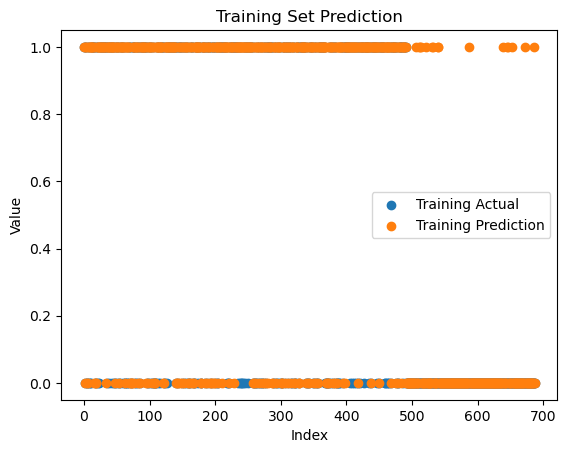%0A)

![](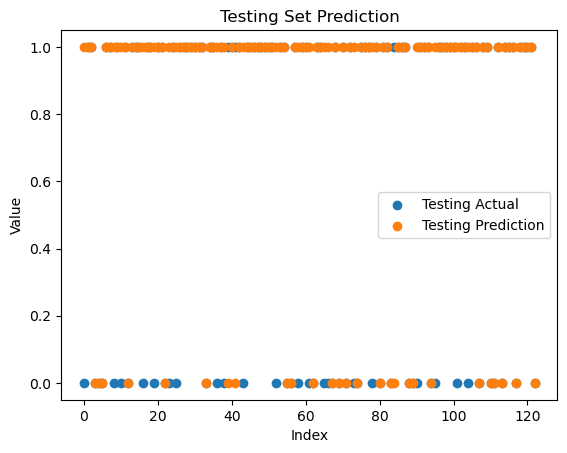%0A)

# Decision Tree Classifier<a href="#Decision-Tree-Classifier" class="anchor-link">¶</a>

In \[88\]:

    #Specifying the Grid
    param_grid = {'max_depth': [3,4,5 ],'min_samples_split': [10, 15, 20],'min_samples_leaf': [5, 10, 15],'max_features':['auto','sqrt','log2']}

In \[89\]:

    #Setting up the Grid Search 
    D1=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=5,scoring='accuracy')

In \[90\]:

    #Fitting our training Data Set
    D1.fit(X_train,y_train)

Out\[90\]:

    GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                 param_grid={'max_depth': [3, 4, 5],
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': [5, 10, 15],
                             'min_samples_split': [10, 15, 20]},
                 scoring='accuracy')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                 param_grid={'max_depth': [3, 4, 5],
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': [5, 10, 15],
                             'min_samples_split': [10, 15, 20]},
                 scoring='accuracy')

estimator: DecisionTreeClassifier

    DecisionTreeClassifier()

DecisionTreeClassifier

    DecisionTreeClassifier()

In \[91\]:

    #Finding the Best parameter grid combination
    D1.best_params_

Out\[91\]:

    {'max_depth': 5,
     'max_features': 'sqrt',
     'min_samples_leaf': 10,
     'min_samples_split': 15}

In \[92\]:

    #Fitting the best Params in D1
    D1=DecisionTreeClassifier(**D1.best_params_)

In \[93\]:

    #Fitting the training DataSet
    D1.fit(X_train,y_train)

Out\[93\]:

    DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=10,
                           min_samples_split=15)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

DecisionTreeClassifier

    DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=10,
                           min_samples_split=15)

In \[94\]:

    #Predicting our test Data Set
    D1Pred=D1.predict(X_test)

In \[95\]:

    #Confusion Matrix
    cm=confusion_matrix(y_test,D1Pred)

In \[96\]:

    #Displaying the Confusion Matrix
    CM=ConfusionMatrixDisplay(cm)
    CM.plot()

Out\[96\]:

    <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x172c8d8bac0>

![](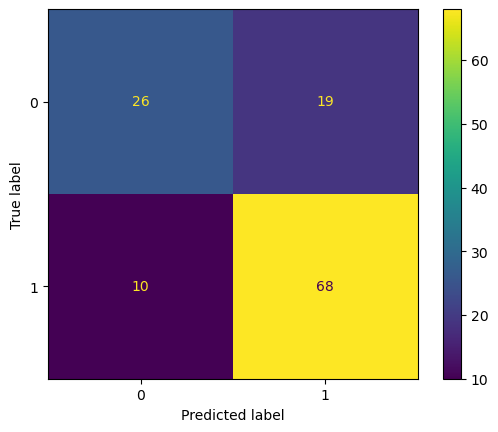%0A)

In \[97\]:

    #Printing the classification Report
    print (classification_report(y_test,D1Pred))

                  precision    recall  f1-score   support

               0       0.72      0.58      0.64        45
               1       0.78      0.87      0.82        78

        accuracy                           0.76       123
       macro avg       0.75      0.72      0.73       123
    weighted avg       0.76      0.76      0.76       123

In \[98\]:

    print (f"The accuracy score for test Dataset is {accuracy_score(y_test,D1Pred)} for Decision Tree")

    The accuracy score for test Dataset is 0.7642276422764228 for Decision Tree

In \[99\]:

    fig = plt.figure(figsize=(50,30))
    _ = tree.plot_tree(D1, feature_names=list(X.columns),class_names=list(Bootcamp['Loan_Status']),filled=True,fontsize=30)

![](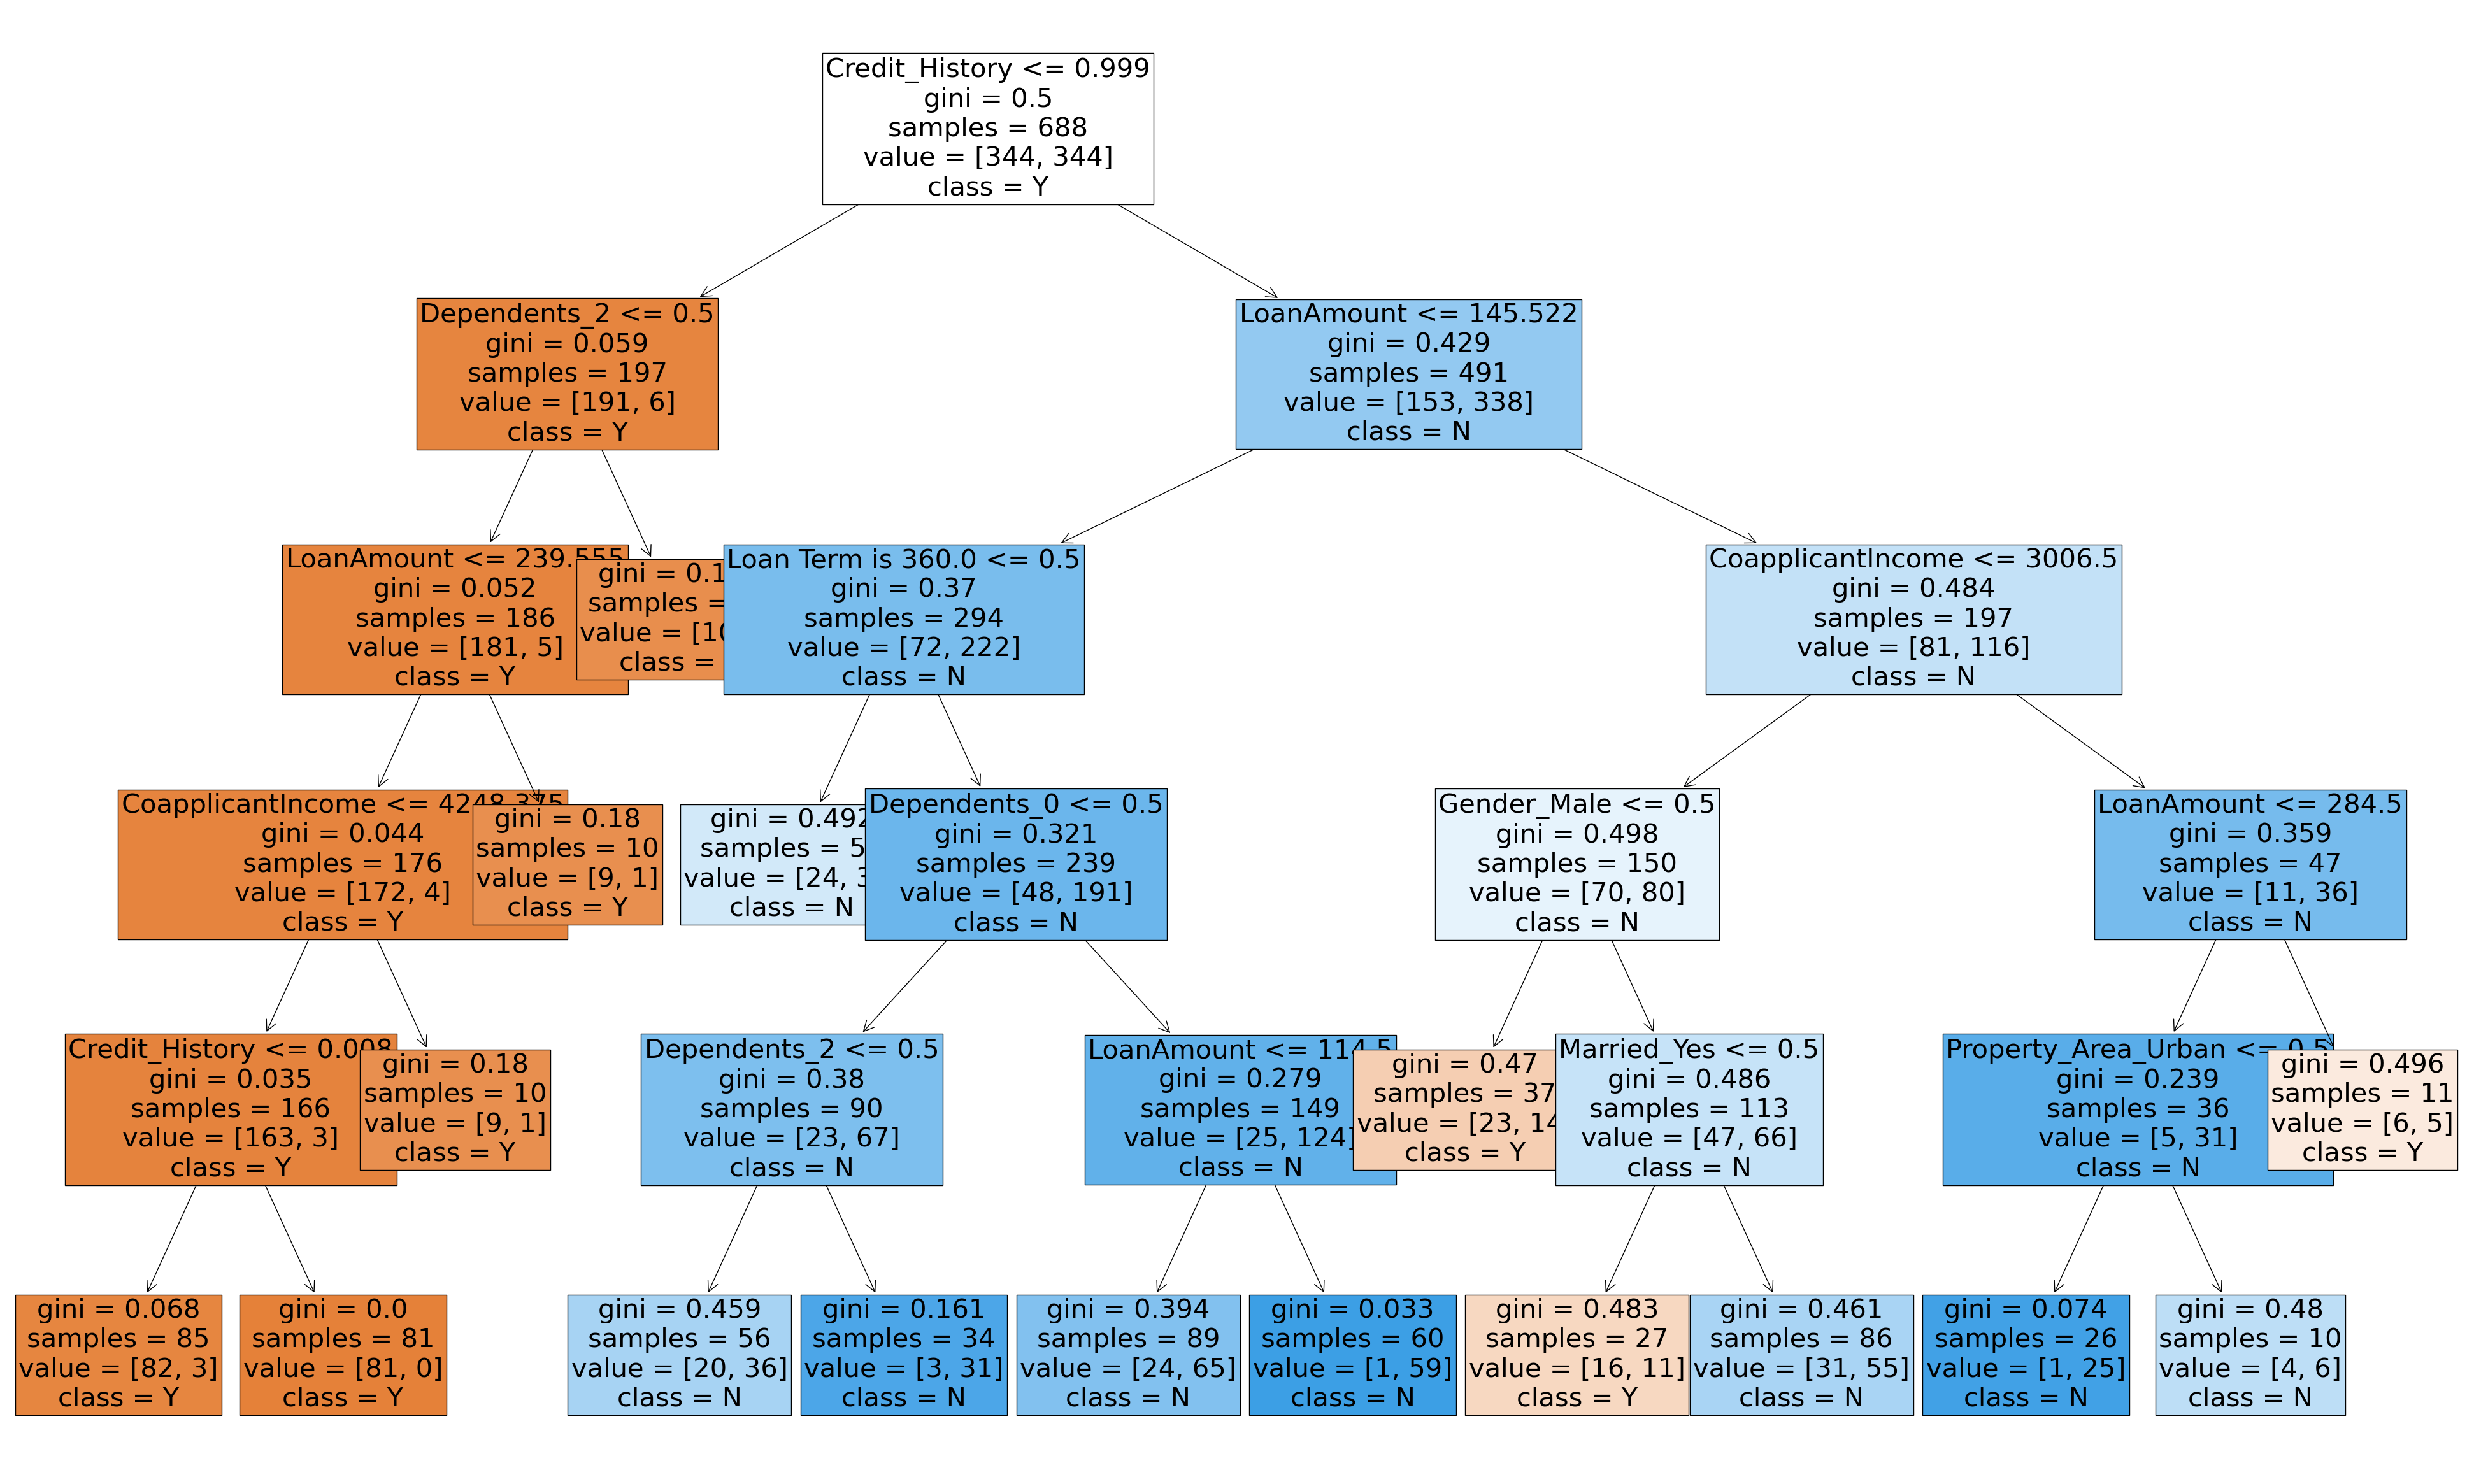%0A)

## While reading the decision tree ,any Categorical Value takes 0 or 1, so a Categorical Variable less than equal to 0.5 implies the Categorical Variable is 0<a
href="#While-reading-the-decision-tree-,any-Categorical-Value-takes-0-or-1,-so-a-Categorical-Variable-less-than-equal-to-0.5-implies-the-Categorical-Variable-is-0"
class="anchor-link">¶</a>

In \[100\]:

    #Checking Accuracy score of the Decision Tree
    D1trainpred=D1.predict(X_train)
    print(accuracy_score(y_train,D1trainpred))
    print(f"The accuracy score of Decision Tree is {accuracy_score(y_train,D1trainpred)}")

    0.7906976744186046
    The accuracy score of Decision Tree is 0.7906976744186046

In \[181\]:

    plt.scatter(x=range(len(X_train)),y=y_train,label='Training Actual')
    plt.scatter(x=range(len(X_train)),y=D1trainpred,cmap="red",label='Training Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Training Set Prediction')
    plt.legend()
    plt.show()
    plt.scatter(x=range(len(X_test)),y=y_test,label='Testing Actual')
    plt.scatter(x=range(len(X_test)),y=D1Pred,cmap="red",label='Testing Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Testing Set Prediction')
    plt.legend()
    plt.show()

![](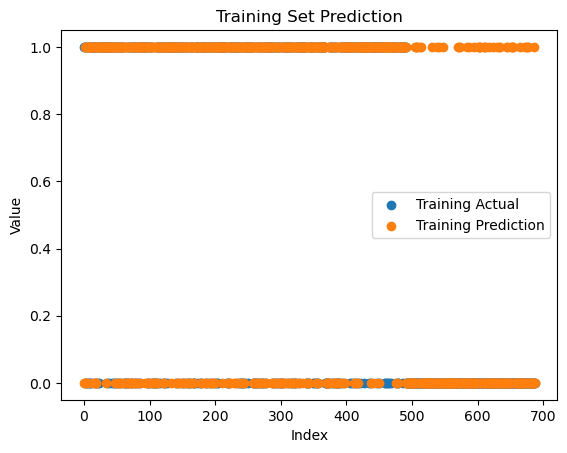%0A)

![](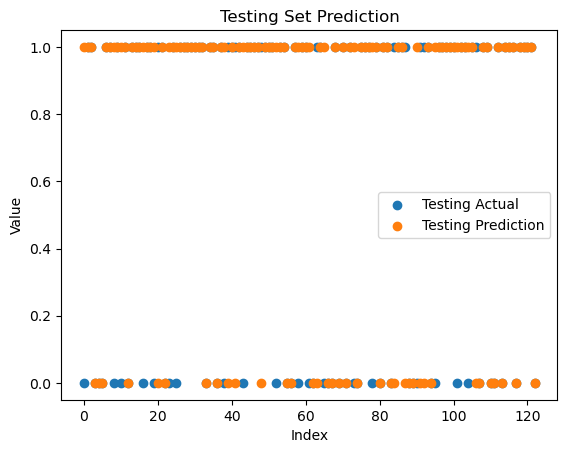%0A)

### Logistic Regression has a better accuracy score than Decision Tree<a
href="#Logistic-Regression-has-a-better-accuracy-score-than-Decision-Tree"
class="anchor-link">¶</a>

## Bagging and Grid Search<a href="#Bagging-and-Grid-Search" class="anchor-link">¶</a>

In \[101\]:

    #Specifying the Grid Search
    base_classifier=DecisionTreeClassifier()

In \[102\]:

    #Defining Parameter Grid
    param_grid={'base_estimator':[base_classifier],'n_estimators':[50, 100, 150],'max_samples':[0.3,0.5,1],'max_features':[0.5,0.8,1]}

In \[103\]:

    #Initiating Grid Search
    Bag=GridSearchCV(BaggingClassifier(),param_grid,cv=5,scoring="accuracy")

In \[104\]:

    #Feeding the training Data
    Bag.fit(X_train,y_train)

Out\[104\]:

    GridSearchCV(cv=5, estimator=BaggingClassifier(),
                 param_grid={'base_estimator': [DecisionTreeClassifier()],
                             'max_features': [0.5, 0.8, 1],
                             'max_samples': [0.3, 0.5, 1],
                             'n_estimators': [50, 100, 150]},
                 scoring='accuracy')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=5, estimator=BaggingClassifier(),
                 param_grid={'base_estimator': [DecisionTreeClassifier()],
                             'max_features': [0.5, 0.8, 1],
                             'max_samples': [0.3, 0.5, 1],
                             'n_estimators': [50, 100, 150]},
                 scoring='accuracy')

estimator: BaggingClassifier

    BaggingClassifier()

BaggingClassifier

    BaggingClassifier()

In \[105\]:

    #Finding the best p0arameter
    param=Bag.best_params_

In \[106\]:

    #Fiting the best Parameter in the Dataset and making our 
    #Bagger again
    Bag=BaggingClassifier(**param)

In \[107\]:

    #Fitting our X train and Y train values
    Bag.fit(X_train,y_train)

Out\[107\]:

    BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                      max_samples=0.3, n_estimators=100)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

BaggingClassifier

    BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                      max_samples=0.3, n_estimators=100)

base_estimator: DecisionTreeClassifier

    DecisionTreeClassifier()

DecisionTreeClassifier

    DecisionTreeClassifier()

In \[108\]:

    #Predicting our test variable outcome
    Bag1=Bag.predict(X_test)

In \[109\]:

    #Printing the confusion Matrix
    cm=confusion_matrix(y_test,Bag1)
    CM=ConfusionMatrixDisplay(cm)
    CM.plot()

Out\[109\]:

    <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x172cb987d60>

![](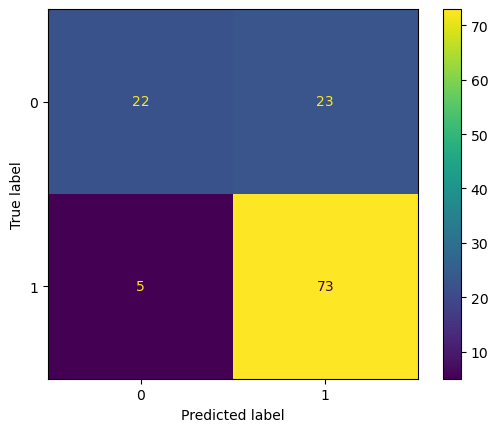%0A)

In \[110\]:

    #Printing our Classification Report of our Decision Tree
    print (classification_report(y_test,Bag1))

                  precision    recall  f1-score   support

               0       0.81      0.49      0.61        45
               1       0.76      0.94      0.84        78

        accuracy                           0.77       123
       macro avg       0.79      0.71      0.73       123
    weighted avg       0.78      0.77      0.76       123

In \[111\]:

    print (f"The Accuracy score of Bagging test is {accuracy_score(y_test,Bag1)}")

    The Accuracy score of Bagging test is 0.7723577235772358

In \[112\]:

    #Predicting our Training Variable Outcome
    Bag2=Bag.predict(X_train)

In \[113\]:

    #Printing our Accuracy score for Training Variable 
    print (f"The Accuracy score of Bagging train is {accuracy_score(y_train,Bag2)}")

    The Accuracy score of Bagging train is 0.9505813953488372

In \[182\]:

    plt.scatter(x=range(len(X_train)),y=y_train,label='Training Actual')
    plt.scatter(x=range(len(X_train)),y=Bag2,cmap="red",label='Training Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Training Set Prediction')
    plt.legend()
    plt.show()
    plt.scatter(x=range(len(X_test)),y=y_test,label='Testing Actual')
    plt.scatter(x=range(len(X_test)),y=Bag1,cmap="red",label='Testing Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Testing Set Prediction')
    plt.legend()
    plt.show()

![](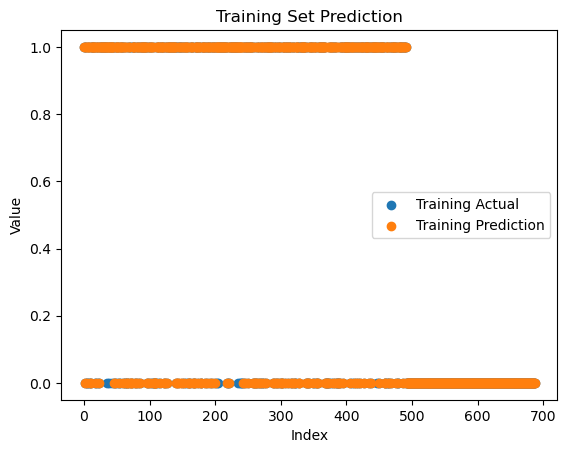%0A)

![](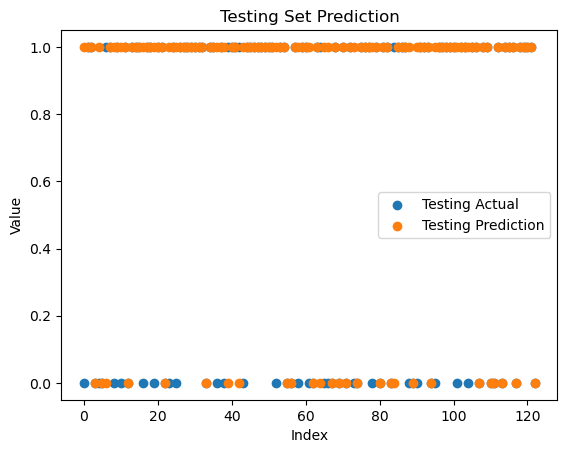%0A)

### 3)Bagging does better than Decision Tree in terms of accuracy score but lower than Logistic Regression<a
href="#3)Bagging-does-better-than-Decision-Tree-in-terms-of-accuracy-score-but-lower-than-Logistic-Regression"
class="anchor-link">¶</a>

## Random Forest Classifier<a href="#Random-Forest-Classifier" class="anchor-link">¶</a>

### Random Forest Classifier with Grid Search<a href="#Random-Forest-Classifier-with-Grid-Search"
class="anchor-link">¶</a>

In \[115\]:

    #Setting the parameter Grid
    param_grid={"n_estimators":[64,100,128],"max_depth":[None,10,20],"min_samples_split":[2,5,10],"min_samples_leaf":[1,2,4],"max_features":['auto','sqrt','log2']}

In \[116\]:

    #Setting up the Grid Search
    Rf=GridSearchCV(RandomForestClassifier(),param_grid,cv=5,scoring="accuracy")

In \[117\]:

    #Fiting our grid with X train and Y train
    Rf.fit(X_train,y_train)

Out\[117\]:

    GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                 param_grid={'max_depth': [None, 10, 20],
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': [1, 2, 4],
                             'min_samples_split': [2, 5, 10],
                             'n_estimators': [64, 100, 128]},
                 scoring='accuracy')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                 param_grid={'max_depth': [None, 10, 20],
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': [1, 2, 4],
                             'min_samples_split': [2, 5, 10],
                             'n_estimators': [64, 100, 128]},
                 scoring='accuracy')

estimator: RandomForestClassifier

    RandomForestClassifier()

RandomForestClassifier

    RandomForestClassifier()

In \[118\]:

    #Finding the best parameters
    paramrf=Rf.best_params_

In \[119\]:

    #Loading up the Random Forest classifier with best parameters fitted
    Randf=RandomForestClassifier(**paramrf)

In \[120\]:

    #Fitting the classifier with X train and Y train
    Randf.fit(X_train,y_train)

Out\[120\]:

    RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                           n_estimators=64)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

RandomForestClassifier

    RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                           n_estimators=64)

In \[121\]:

    Randfpred=Randf.predict(X_test)

In \[122\]:

    Crf=confusion_matrix(y_test,Randfpred)

In \[123\]:

    CM=ConfusionMatrixDisplay(Crf)
    CM.plot()

Out\[123\]:

    <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x172c70e4910>

![](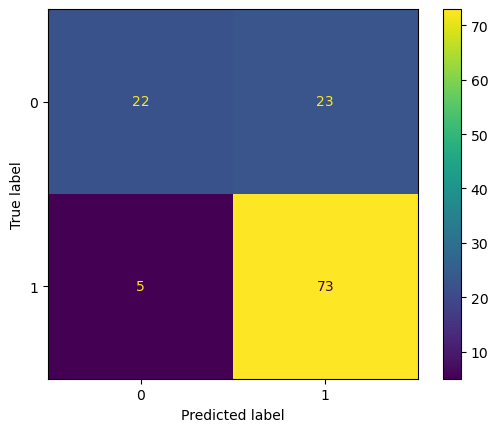%0A)

In \[124\]:

    #printing the classification Report
    print (classification_report(y_test,Randfpred))

                  precision    recall  f1-score   support

               0       0.81      0.49      0.61        45
               1       0.76      0.94      0.84        78

        accuracy                           0.77       123
       macro avg       0.79      0.71      0.73       123
    weighted avg       0.78      0.77      0.76       123

In \[125\]:

    print (f"The accuracy score of Random Forest Classification on test Data is {accuracy_score(y_test,Randfpred)}")

    The accuracy score of Random Forest Classification on test Data is 0.7723577235772358

In \[126\]:

    #Finding the accuracy score with training data prediction
    Rftrain=Randf.predict(X_train)

In \[127\]:

    print (f"The accuracy score of Random Forest Classification on training Data is {accuracy_score(y_train,Rftrain)}")

    The accuracy score of Random Forest Classification on training Data is 0.940406976744186

In \[183\]:

    plt.scatter(x=range(len(X_train)),y=y_train,label='Training Actual')
    plt.scatter(x=range(len(X_train)),y=Rftrain,cmap="red",label='Training Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Training Set Prediction')
    plt.legend()
    plt.show()
    plt.scatter(x=range(len(X_test)),y=y_test,label='Testing Actual')
    plt.scatter(x=range(len(X_test)),y=Randfpred,cmap="red",label='Testing Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Testing Set Prediction')
    plt.legend()
    plt.show()

![](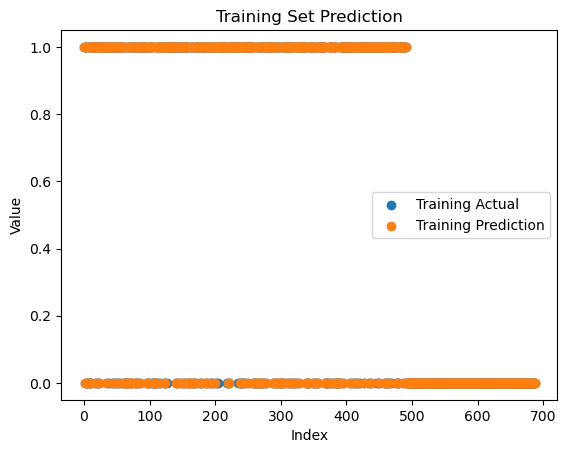%0A)

![](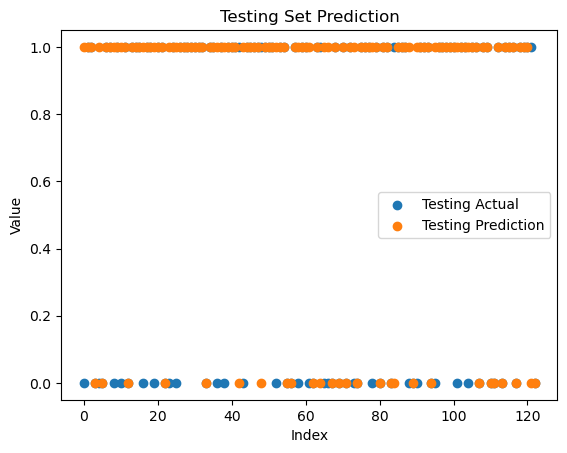%0A)

### 4) Random Forest has an accuracy score equivalent to Bagging respectively<a
href="#4)-Random-Forest-has-an-accuracy-score-equivalent-to-Bagging-respectively"
class="anchor-link">¶</a>

### XG Boost Classifier<a href="#XG-Boost-Classifier" class="anchor-link">¶</a>

In \[128\]:

    #Setting up the parameter grid
    param_grid={'learning_rate':[0.01,0.1,0.3],'n_estimators':[64,100,128],'max_depth':[3,5,7],'subsample':[0.8,1],'colsample_bytree':[0,8,1],'reg_alpha':[0,0.1,0,0.5],'reg_lambda':[0,0.1,0.5]}

In \[129\]:

    #Setting up the Grid Search
    Xtreme=GridSearchCV(xgb.XGBClassifier(),param_grid,cv=5,scoring="accuracy")

In \[130\]:

    #Feeeding with our training Data 
    Xtreme.fit(X_train,y_train)

Out\[130\]:

    GridSearchCV(cv=5,
                 estimator=XGBClassifier(base_score=None, booster=None,
                                         callbacks=None, colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None,
                                         early_stopping_rounds=None,
                                         enable_categorical=False, eval_metric=None,
                                         feature_types=None, gamma=None,
                                         gpu_id=None, grow_policy=None,
                                         importance_type=None,
                                         interaction_constraints=None,
                                         learning_rate=None,...
                                         max_leaves=None, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         n_estimators=100, n_jobs=None,
                                         num_parallel_tree=None, predictor=None,
                                         random_state=None, ...),
                 param_grid={'colsample_bytree': [0, 8, 1],
                             'learning_rate': [0.01, 0.1, 0.3],
                             'max_depth': [3, 5, 7], 'n_estimators': [64, 100, 128],
                             'reg_alpha': [0, 0.1, 0, 0.5],
                             'reg_lambda': [0, 0.1, 0.5], 'subsample': [0.8, 1]},
                 scoring='accuracy')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(cv=5,
                 estimator=XGBClassifier(base_score=None, booster=None,
                                         callbacks=None, colsample_bylevel=None,
                                         colsample_bynode=None,
                                         colsample_bytree=None,
                                         early_stopping_rounds=None,
                                         enable_categorical=False, eval_metric=None,
                                         feature_types=None, gamma=None,
                                         gpu_id=None, grow_policy=None,
                                         importance_type=None,
                                         interaction_constraints=None,
                                         learning_rate=None,...
                                         max_leaves=None, min_child_weight=None,
                                         missing=nan, monotone_constraints=None,
                                         n_estimators=100, n_jobs=None,
                                         num_parallel_tree=None, predictor=None,
                                         random_state=None, ...),
                 param_grid={'colsample_bytree': [0, 8, 1],
                             'learning_rate': [0.01, 0.1, 0.3],
                             'max_depth': [3, 5, 7], 'n_estimators': [64, 100, 128],
                             'reg_alpha': [0, 0.1, 0, 0.5],
                             'reg_lambda': [0, 0.1, 0.5], 'subsample': [0.8, 1]},
                 scoring='accuracy')

estimator: XGBClassifier

    XGBClassifier(base_score=None, booster=None, callbacks=None,
                  colsample_bylevel=None, colsample_bynode=None,
                  colsample_bytree=None, early_stopping_rounds=None,
                  enable_categorical=False, eval_metric=None, feature_types=None,
                  gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                  interaction_constraints=None, learning_rate=None, max_bin=None,
                  max_cat_threshold=None, max_cat_to_onehot=None,
                  max_delta_step=None, max_depth=None, max_leaves=None,
                  min_child_weight=None, missing=nan, monotone_constraints=None,
                  n_estimators=100, n_jobs=None, num_parallel_tree=None,
                  predictor=None, random_state=None, ...)

XGBClassifier

    XGBClassifier(base_score=None, booster=None, callbacks=None,
                  colsample_bylevel=None, colsample_bynode=None,
                  colsample_bytree=None, early_stopping_rounds=None,
                  enable_categorical=False, eval_metric=None, feature_types=None,
                  gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
                  interaction_constraints=None, learning_rate=None, max_bin=None,
                  max_cat_threshold=None, max_cat_to_onehot=None,
                  max_delta_step=None, max_depth=None, max_leaves=None,
                  min_child_weight=None, missing=nan, monotone_constraints=None,
                  n_estimators=100, n_jobs=None, num_parallel_tree=None,
                  predictor=None, random_state=None, ...)

In \[131\]:

    ###Checking out the best parameters
    Xtreme=Xtreme.best_params_

In \[132\]:

    ###Making the Gradient Boost with the best parameters rigged
    XGB=xgb.XGBClassifier(**Xtreme)

In \[133\]:

    ###Fitting our XGB 
    XGB.fit(X_train,y_train)

Out\[133\]:

    XGBClassifier(base_score=None, booster=None, callbacks=None,
                  colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
                  early_stopping_rounds=None, enable_categorical=False,
                  eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                  grow_policy=None, importance_type=None,
                  interaction_constraints=None, learning_rate=0.1, max_bin=None,
                  max_cat_threshold=None, max_cat_to_onehot=None,
                  max_delta_step=None, max_depth=3, max_leaves=None,
                  min_child_weight=None, missing=nan, monotone_constraints=None,
                  n_estimators=128, n_jobs=None, num_parallel_tree=None,
                  predictor=None, random_state=None, ...)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

XGBClassifier

    XGBClassifier(base_score=None, booster=None, callbacks=None,
                  colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
                  early_stopping_rounds=None, enable_categorical=False,
                  eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
                  grow_policy=None, importance_type=None,
                  interaction_constraints=None, learning_rate=0.1, max_bin=None,
                  max_cat_threshold=None, max_cat_to_onehot=None,
                  max_delta_step=None, max_depth=3, max_leaves=None,
                  min_child_weight=None, missing=nan, monotone_constraints=None,
                  n_estimators=128, n_jobs=None, num_parallel_tree=None,
                  predictor=None, random_state=None, ...)

In \[134\]:

    XGPred=XGB.predict(X_test)

In \[135\]:

    #Printing our Confusion Matrix 
    CMxgboost=confusion_matrix(y_test,XGPred)
    CM=ConfusionMatrixDisplay(CMxgboost)
    CM.plot()

Out\[135\]:

    <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x172c7503d00>

![](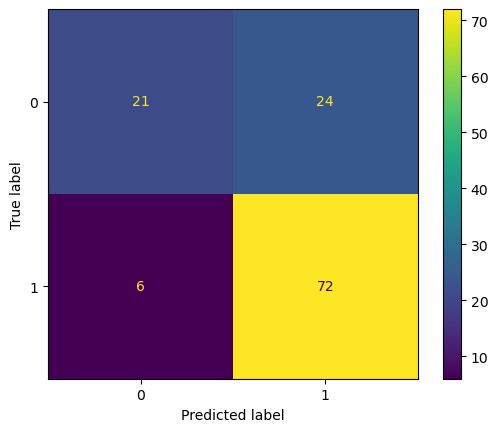%0A)

In \[136\]:

    #Classification Report
    print (classification_report(y_test,XGPred))

                  precision    recall  f1-score   support

               0       0.78      0.47      0.58        45
               1       0.75      0.92      0.83        78

        accuracy                           0.76       123
       macro avg       0.76      0.69      0.71       123
    weighted avg       0.76      0.76      0.74       123

In \[137\]:

    # Finding the accuracy score for test data
    accuracy_score(y_test,XGPred)

Out\[137\]:

    0.7560975609756098

In \[138\]:

    print (f"the accuracy score of XGBoosting test prediction is {accuracy_score(y_test,XGPred)}")

    the accuracy score of XGBoosting test prediction is 0.7560975609756098

In \[139\]:

    # Finding the accuracy score of training DataSet
    trainingaccuracy=XGB.predict(X_train)

In \[140\]:

    print (f"the accuracy score of XGBoosting training prediction is {accuracy_score(y_train,trainingaccuracy)}")

    the accuracy score of XGBoosting training prediction is 0.9302325581395349

In \[184\]:

    plt.scatter(x=range(len(X_train)),y=y_train,label='Training Actual')
    plt.scatter(x=range(len(X_train)),y=trainingaccuracy,cmap="red",label='Training Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Training Set Prediction')
    plt.legend()
    plt.show()
    plt.scatter(x=range(len(X_test)),y=y_test,label='Testing Actual')
    plt.scatter(x=range(len(X_test)),y=XGPred,cmap="red",label='Testing Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Testing Set Prediction')
    plt.legend()
    plt.show()

![](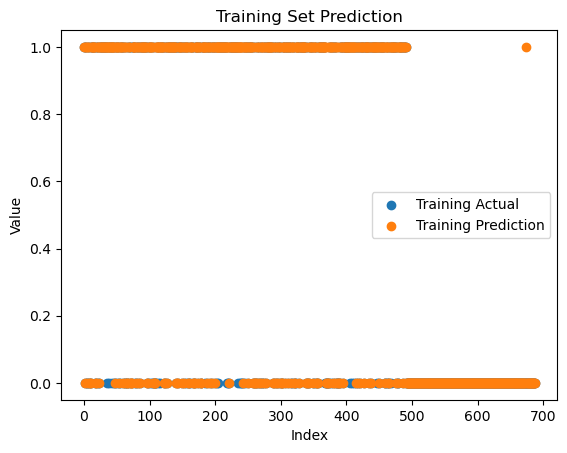%0A)

![](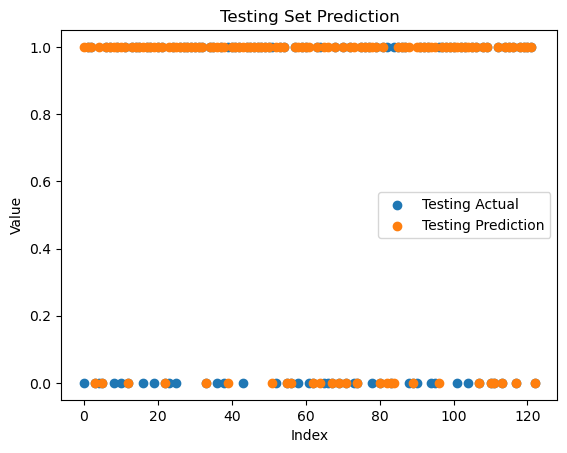%0A)

#### 5)XG Boosting performs slightly worse than Decision Tree as the recall score for predicting Loan Status is Not is low significantly<a
href="#5)XG-Boosting-performs-slightly-worse-than-Decision-Tree-as-the-recall-score-for-predicting-Loan-Status-is-Not-is-low-significantly"
class="anchor-link">¶</a>

## Support Vector Machine<a href="#Support-Vector-Machine" class="anchor-link">¶</a>

### From computations it has been found Hyparametric Tuning for polynomial and Linear kernel is computational in terms of time , hence parametric tuning is done only for rbf kernel respectively<a
href="#From-computations-it-has-been-found-Hyparametric-Tuning-for-polynomial-and-Linear-kernel-is-computational-in-terms-of-time-,-hence-parametric-tuning-is-done-only-for-rbf-kernel-respectively"
class="anchor-link">¶</a>

#### Rbf kernel<a href="#Rbf-kernel" class="anchor-link">¶</a>

In \[141\]:

    param_grid={'C':[0.1,1,10],'kernel':['rbf','sigmoid'],'gamma':['scale','auto',0.1,0.01],'degree':[2,3,4]}

In \[142\]:

    #Setting up the Grid Search 
    Rbf=GridSearchCV(SVC(),param_grid)

In \[143\]:

    #Fitting our Rbf with training data 
    Rbf.fit(X_train,y_train)

Out\[143\]:

    GridSearchCV(estimator=SVC(),
                 param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                             'gamma': ['scale', 'auto', 0.1, 0.01],
                             'kernel': ['rbf', 'sigmoid']})

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

GridSearchCV

    GridSearchCV(estimator=SVC(),
                 param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                             'gamma': ['scale', 'auto', 0.1, 0.01],
                             'kernel': ['rbf', 'sigmoid']})

estimator: SVC

    SVC()

SVC

    SVC()

In \[144\]:

    #Finding the best parameter
    Param=Rbf.best_params_

In \[145\]:

    #Rigging our kernel with the best Parameter
    rbf=SVC(C=Param['C'],kernel=Param['kernel'],gamma=Param['gamma'])

In \[146\]:

    #Fitting our SVC with training data
    rbf.fit(X_train,y_train)

Out\[146\]:

    SVC(C=10, gamma=0.01)

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SVC

    SVC(C=10, gamma=0.01)

In \[147\]:

    #Predict our test dataset 
    rbfpred=rbf.predict(X_test)

In \[148\]:

    #Printing our Confusion Matrix 
    CMSVM=confusion_matrix(y_test,rbfpred)
    CM=ConfusionMatrixDisplay(CMSVM)
    CM.plot()

Out\[148\]:

    <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x172c74cbe20>

![](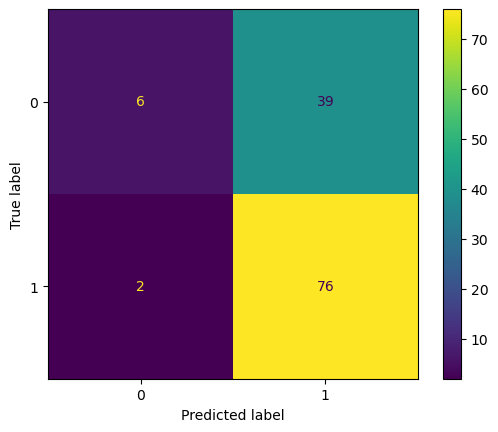%0A)

In \[149\]:

    #Printing the classification report
    print (classification_report(y_test,rbfpred))

                  precision    recall  f1-score   support

               0       0.75      0.13      0.23        45
               1       0.66      0.97      0.79        78

        accuracy                           0.67       123
       macro avg       0.71      0.55      0.51       123
    weighted avg       0.69      0.67      0.58       123

In \[150\]:

    #Predicting our training data set accuracy score
    print (f"The accuracy score of rbf kernel in SVM of traing data set is {accuracy_score(y_train,rbf.predict(X_train))}")

    The accuracy score of rbf kernel in SVM of traing data set is 1.0

In \[151\]:

    #Printing the accuracy score of test data
    print (f"The accuracy score of rbf kernel in SVM of test data is {accuracy_score(y_test,rbfpred)}")

    The accuracy score of rbf kernel in SVM of test data is 0.6666666666666666

In \[185\]:

    plt.scatter(x=range(len(X_train)),y=y_train,label='Training Actual')
    plt.scatter(x=range(len(X_train)),y=rbf.predict(X_train),cmap="red",label='Training Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Training Set Prediction')
    plt.legend()
    plt.show()
    plt.scatter(x=range(len(X_test)),y=y_test,label='Testing Actual')
    plt.scatter(x=range(len(X_test)),y=rbfpred,cmap="red",label='Testing Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Testing Set Prediction')
    plt.legend()
    plt.show()

![](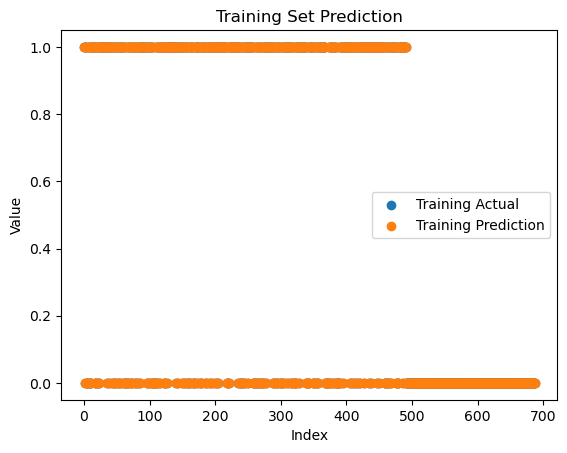%0A)

![](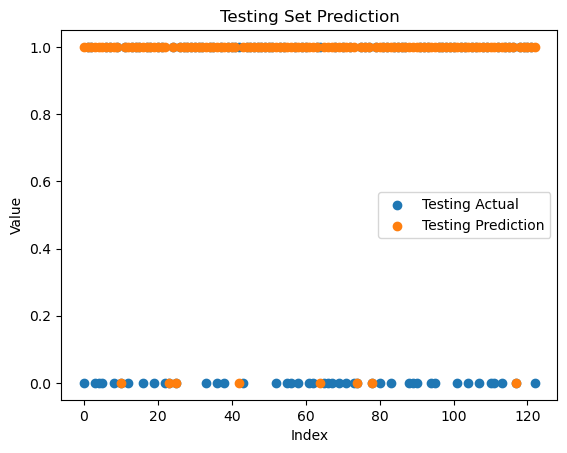%0A)

#### From the Testing graph above one can clearly state the reason for low accuracy score, in case of Y=0 the<a
href="#From-the-Testing-graph-above-one-can-clearly-state-the-reason-for-low-accuracy-score,-in-case-of-Y=0-the"
class="anchor-link">¶</a>

#### Polynomial kernel<a href="#Polynomial-kernel" class="anchor-link">¶</a>

In \[78\]:

    Pk=SVC(kernel="poly",degree=5)

In \[79\]:

    #Fitting the train data in it
    Pk.fit(X_train,y_train)

Out\[79\]:

    SVC(degree=5, kernel='poly')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SVC

    SVC(degree=5, kernel='poly')

In \[80\]:

    #Finding our test data prediction
    Pktest=Pk.predict(X_test)

In \[81\]:

    #Printing our Confusion Matrix 
    PkSVM=confusion_matrix(y_test,Pktest)
    CMPk=ConfusionMatrixDisplay(PkSVM)
    CMPk.plot()

Out\[81\]:

    <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x24409b4a190>

![](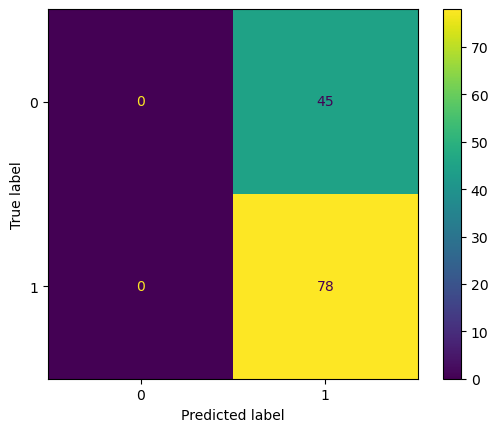%0A)

In \[82\]:

    #Printing the classification report
    print (classification_report(y_test,Pktest))

                  precision    recall  f1-score   support

               0       0.00      0.00      0.00        45
               1       0.63      1.00      0.78        78

        accuracy                           0.63       123
       macro avg       0.32      0.50      0.39       123
    weighted avg       0.40      0.63      0.49       123

In \[83\]:

    #Finding the training accuracy score
    print (f"The accuracy score of polynomial kernel in SVM of training data set is {accuracy_score(y_train,Pk.predict(X_train))}")

    The accuracy score of polynomial kernel in SVM of training data set is 0.5174418604651163

In \[84\]:

    #Finding our test accuracy score
    print (f"The accuracy score of polynomial kernel in SVM of test data set is {accuracy_score(y_test,Pktest)}")

    The accuracy score of polynomial kernel in SVM of test data set is 0.6341463414634146

In \[85\]:

    plt.scatter(x=range(len(X_train)),y=y_train,label='Training Actual')
    plt.scatter(x=range(len(X_train)),y=Pk.predict(X_train),cmap="red",label='Training Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Training Set Prediction')
    plt.legend()
    plt.show()
    plt.scatter(x=range(len(X_test)),y=y_test,label='Testing Actual')
    plt.scatter(x=range(len(X_test)),y=Pktest,cmap="red",label='Testing Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Testing Set Prediction')
    plt.legend()
    plt.show()

![](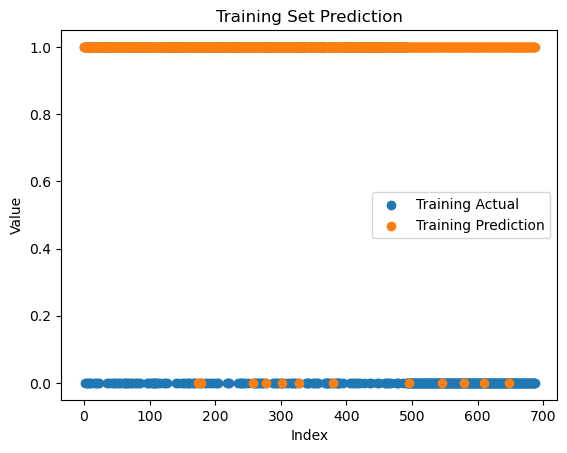%0A)

![](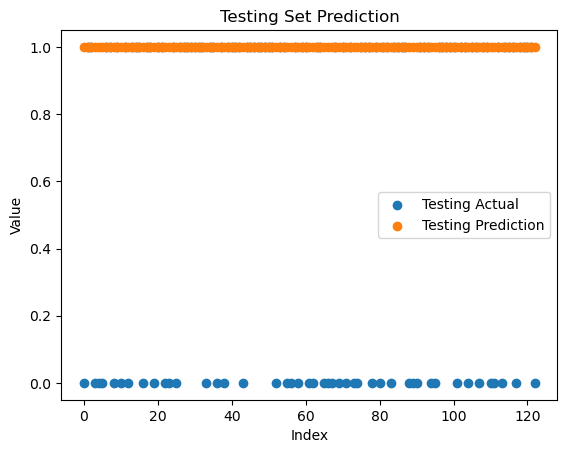%0A)

#### Linear Kernel<a href="#Linear-Kernel" class="anchor-link">¶</a>

In \[86\]:

    Lk=SVC(kernel='linear')

In \[87\]:

    #Fitting the model with training data
    Lk.fit(X_train,y_train)

Out\[87\]:

    SVC(kernel='linear')

**In a Jupyter environment, please rerun this cell to show the HTML
representation or trust the notebook.  
On GitHub, the HTML representation is unable to render, please try
loading this page with nbviewer.org.**

SVC

    SVC(kernel='linear')

In \[88\]:

    #Predicting our test data 
    LkPred=Lk.predict(X_test)

In \[89\]:

    #Plotting our confusion Matrix
    LkSVM=confusion_matrix(y_test,LkPred)
    CMLk=ConfusionMatrixDisplay(LkSVM)
    CMLk.plot()

Out\[89\]:

    <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x2440915e550>

![](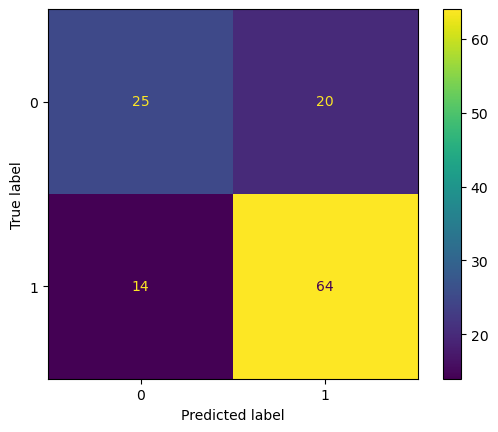%0A)

In \[90\]:

    #Printing the classification report
    print (classification_report(y_test,LkPred))

                  precision    recall  f1-score   support

               0       0.64      0.56      0.60        45
               1       0.76      0.82      0.79        78

        accuracy                           0.72       123
       macro avg       0.70      0.69      0.69       123
    weighted avg       0.72      0.72      0.72       123

In \[91\]:

    #Finding the training accuracy score
    print (f"The accuracy score of Linear kernel in SVM of training data set is {accuracy_score(y_train,Lk.predict(X_train))}")

    The accuracy score of Linear kernel in SVM of training data set is 0.8255813953488372

In \[92\]:

    #Finding our test accuracy score
    print (f"The accuracy score of Linear kernel in SVM of test data set is {accuracy_score(y_test,LkPred)}")

    The accuracy score of Linear kernel in SVM of test data set is 0.7235772357723578

In \[93\]:

    plt.scatter(x=range(len(X_train)),y=y_train,label='Training Actual')
    plt.scatter(x=range(len(X_train)),y=Lk.predict(X_train),cmap="red",label='Training Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Training Set Prediction')
    plt.legend()
    plt.show()
    plt.scatter(x=range(len(X_test)),y=y_test,label='Testing Actual')
    plt.scatter(x=range(len(X_test)),y=LkPred,cmap="red",label='Testing Prediction')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Testing Set Prediction')
    plt.legend()
    plt.show()

![](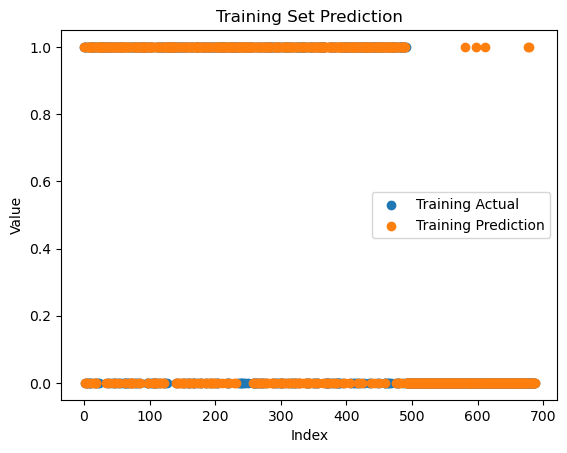%0A)

![](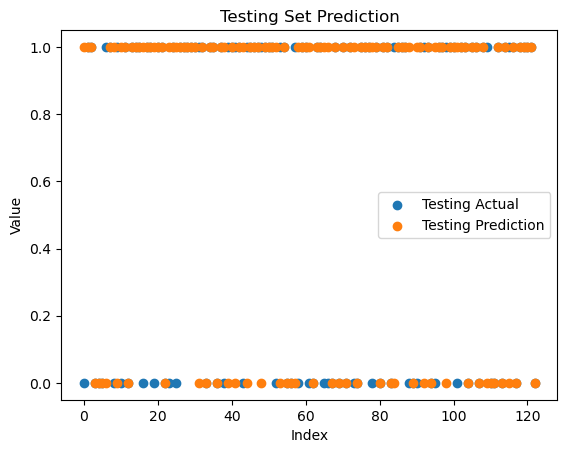%0A)

#### SVM with linear kernel has a lower accuracy than XG Boost<a href="#SVM-with-linear-kernel-has-a-lower-accuracy-than-XG-Boost"
class="anchor-link">¶</a>

### Thus in terms of accuracy score

### 1) Logistic Regression Accuracy Score is 80.48%

### 2) Bagging and Random Forest Accuracy Score is 77.23%

### 3) Decision Tree Accuracy Score is 76.42%

### 4) XG Boosting Accuracy Score is 75.61%

### 5) SVM with Linear Kernel Accuracy Score is 72.36%

### 5) SVM with rbf kernel Accuracy Score is 66%

### 6) SVM with polynomial Kernel Accuracy Score is 63.41%

In \[95\]:

    from sklearn.model_selection import KFold, cross_val_score

    k_folds = KFold(n_splits = 5)

    scores = cross_val_score(LogisticRegression(penalty="l2",C=10), X, y, cv = k_folds)

    print("Cross Validation Scores: ", scores)
    print("Average CV Score: ", scores.mean())
    print("Number of CV Scores used in Average: ", len(scores))

    Cross Validation Scores:  [0.80487805 0.75609756 0.81300813 0.83739837 0.81147541]
    Average CV Score:  0.8045715047314408
    Number of CV Scores used in Average:  5

In \[96\]:

    from sklearn.model_selection import KFold, cross_val_score

    k_folds = KFold(n_splits = 5)

    scores = cross_val_score(BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=0.5,
                      max_samples=0.3, n_estimators=100), X, y, cv = k_folds)

    print("Cross Validation Scores: ", scores)
    print("Average CV Score: ", scores.mean())
    print("Number of CV Scores used in Average: ", len(scores))

    Cross Validation Scores:  [0.78861789 0.73170732 0.78861789 0.84552846 0.77868852]
    Average CV Score:  0.7866320138611222
    Number of CV Scores used in Average:  5

In \[99\]:

    from sklearn.model_selection import KFold, cross_val_score

    k_folds = KFold(n_splits = 5)

    scores = cross_val_score(RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                           n_estimators=64), X, y, cv = k_folds)

    print("Cross Validation Scores: ", scores)
    print("Average CV Score: ", scores.mean())
    print("Number of CV Scores used in Average: ", len(scores))

    Cross Validation Scores:  [0.80487805 0.74796748 0.79674797 0.84552846 0.81147541]
    Average CV Score:  0.8013194722111155
    Number of CV Scores used in Average:  5

### Thus Logistic Regression performs better in Cross Validation as well than both Bagging and Random Forest, though Random Forest has a greater boost in accuracy score than Bagging in Cross Validation, it is still lower than Logistic Regression, Thus we finally choose \$\color{red}{\text {Logistic Regresssion as our best model}}\$ for our analysis purpose respectively.<a
href="#Thus-Logistic-Regression-performs-better-in-Cross-Validation-as-well-than-both-Bagging-and-Random-Forest,-though-Random-Forest-has-a-greater-boost-in-accuracy-score-than-Bagging-in-Cross-Validation,-it-is-still-lower-than-Logistic-Regression,-Thus-we-finally-choose-$%5Ccolor%7Bred%7D%7B%5Ctext-%7BLogistic-Regresssion-as-our-best-model%7D%7D$-for-our-analysis-purpose-respectively."
class="anchor-link">¶</a>

#### Logistic Regression AUC curve<a href="#Logistic-Regression-AUC-curve" class="anchor-link">¶</a>

In \[100\]:

    def plot_roc_curve(y_test, y_pred):
        """
        plots the roc curve based of the probabilities
        """

        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

In \[112\]:

    TunedLog=LogisticRegression(penalty="l2",C=10).fit(X_train,y_train).predict(X_test)

In \[113\]:

    plot_roc_curve(y_test, TunedLog)
    print(f'model 1 AUC score: {roc_auc_score(y_test, TunedLog)}')

    model 1 AUC score: 0.7474358974358974

![](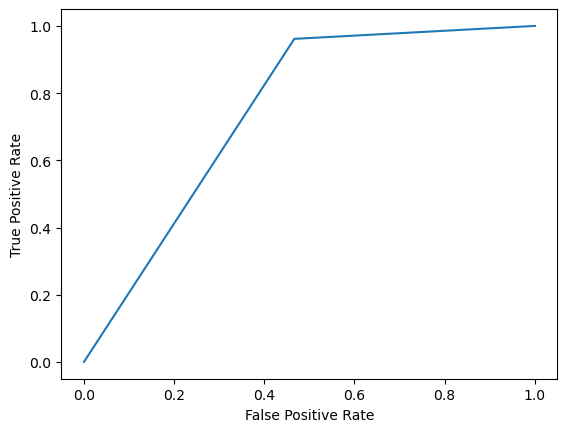%0A)

#### Random Forest<a href="#Random-Forest" class="anchor-link">¶</a>

In \[114\]:

    def plot_roc_curve(y_test, y_pred):
        """
        plots the roc curve based of the probabilities
        """

        fpr, tpr, thresholds = roc_curve(y_test, y_pred)
        plt.plot(fpr, tpr)
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')

In \[116\]:

    Rfpred=RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,n_estimators=64).fit(X_train,y_train).predict(X_test)

In \[117\]:

    plot_roc_curve(y_test, Rfpred)
    print(f'model 1 AUC score: {roc_auc_score(y_test, Rfpred)}')

    model 1 AUC score: 0.7188034188034188

![](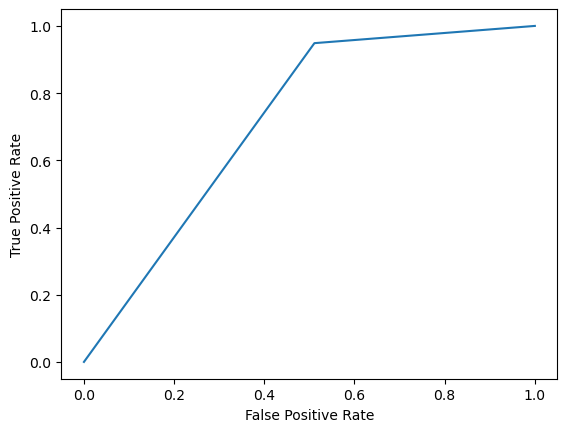%0A)

## Feature Importance<a href="#Feature-Importance" class="anchor-link">¶</a>

### Checking Chi Square to test feature Importance<a href="#Checking-Chi-Square-to-test-feature-Importance"
class="anchor-link">¶</a>

In \[120\]:

    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2

    features = X
    target = y

    best_features = SelectKBest(score_func = chi2,k = 'all')
    fit = best_features.fit(features,target)

    featureScores = pd.DataFrame(data = fit.scores_,index = list(X.columns),columns = ['Chi Squared Score']) 

In \[121\]:

    featureScores.sort_values(by = 'Chi Squared Score', ascending = False)

Out\[121\]:

|                         | Chi Squared Score |
|-------------------------|-------------------|
| CoapplicantIncome       | 11342.041603      |
| ApplicantIncome         | 93.904964         |
| LoanAmount              | 39.211545         |
| Credit_History          | 26.005877         |
| Property_Area_Semiurban | 7.103093          |
| Loan Term is 480.0      | 5.760693          |
| Property_Area_Rural     | 4.410584          |
| Loan Term is 36.0       | 4.395833          |
| Education_Not Graduate  | 3.540502          |
| Married_No              | 3.355645          |
| Dependents_2            | 1.996446          |
| Married_Yes             | 1.534292          |
| Loan Term is 120.0      | 1.364929          |
| Education_Graduate      | 0.988390          |
| Loan Term is 60.0       | 0.909953          |
| Property_Area_Urban     | 0.783946          |
| Dependents_1            | 0.768400          |
| Loan Term is 360.0      | 0.458657          |
| Loan Term is 12.0       | 0.454976          |
| Dependents_3+           | 0.384200          |
| Loan Term is 300.0      | 0.312800          |
| Loan Term is 180.0      | 0.162871          |
| Gender_Female           | 0.162407          |
| Gender_Male             | 0.080689          |
| Loan Term is 84.0       | 0.073176          |
| Loan Term is 240.0      | 0.073176          |
| Dependents_0            | 0.010509          |
| Self_Employed_Yes       | 0.007285          |
| Self_Employed_No        | 0.003910          |

#### From Chi-Square Test Co-Applicant Income is the most important feature related with Loan Status<a
href="#From-Chi-Square-Test-Co-Applicant-Income-is-the-most-important-feature-related-with-Loan-Status"
class="anchor-link">¶</a>

#### Decision Tree<a href="#Decision-Tree" class="anchor-link">¶</a>

In \[131\]:

    importances=DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=10,
                           min_samples_split=15).fit(X_train,y_train).feature_importances_

In \[132\]:

    # Sort the feature importance in descending order
    #
    sorted_indices = np.argsort(importances)[::-1]
     
    feat_labels = X.columns
     
    for f in range(X_train.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30,
                                feat_labels[sorted_indices[f]],
                                importances[sorted_indices[f]]))

     1) Credit_History                 0.779137
     2) ApplicantIncome                0.116634
     3) CoapplicantIncome              0.054008
     4) Dependents_2                   0.023833
     5) Property_Area_Semiurban        0.012455
     6) Dependents_0                   0.010358
     7) Loan Term is 180.0             0.002683
     8) Married_No                     0.000506
     9) Property_Area_Rural            0.000386
    10) Dependents_3+                  0.000000
    11) Education_Graduate             0.000000
    12) Self_Employed_No               0.000000
    13) Dependents_1                   0.000000
    14) Married_Yes                    0.000000
    15) Education_Not Graduate         0.000000
    16) Gender_Male                    0.000000
    17) LoanAmount                     0.000000
    18) Property_Area_Urban            0.000000
    19) Self_Employed_Yes              0.000000
    20) Loan Term is 480.0             0.000000
    21) Loan Term is 12.0              0.000000
    22) Loan Term is 36.0              0.000000
    23) Loan Term is 60.0              0.000000
    24) Loan Term is 84.0              0.000000
    25) Loan Term is 120.0             0.000000
    26) Loan Term is 240.0             0.000000
    27) Loan Term is 300.0             0.000000
    28) Loan Term is 360.0             0.000000
    29) Gender_Female                  0.000000

In \[133\]:

    plt.title('Feature Importance')
    plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
    plt.tight_layout()
    plt.show()

![](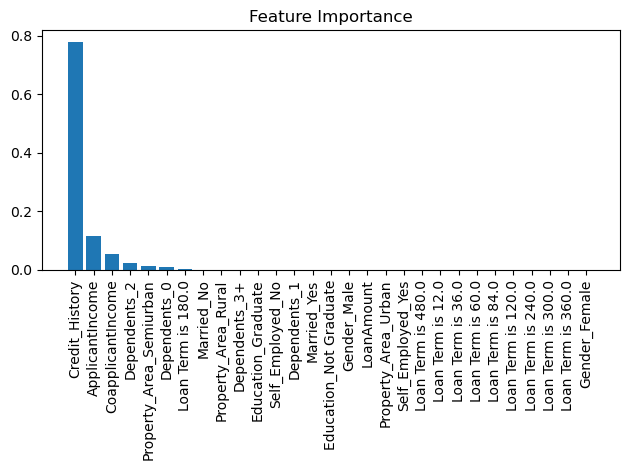%0A)

#### Random Forest<a href="#Random-Forest" class="anchor-link">¶</a>

In \[134\]:

    importances=RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,n_estimators=64).fit(X_train,y_train).feature_importances_

In \[135\]:

    # Sort the feature importance in descending order
    #
    sorted_indices = np.argsort(importances)[::-1]
     
    feat_labels = X.columns
     
    for f in range(X_train.shape[1]):
        print("%2d) %-*s %f" % (f + 1, 30,
                                feat_labels[sorted_indices[f]],
                                importances[sorted_indices[f]]))

     1) Credit_History                 0.310599
     2) ApplicantIncome                0.101718
     3) LoanAmount                     0.095673
     4) Property_Area_Semiurban        0.083143
     5) CoapplicantIncome              0.064988
     6) Education_Graduate             0.043438
     7) Dependents_2                   0.032332
     8) Dependents_0                   0.031539
     9) Loan Term is 360.0             0.027836
    10) Property_Area_Urban            0.025686
    11) Property_Area_Rural            0.023188
    12) Married_No                     0.023145
    13) Gender_Male                    0.021388
    14) Married_Yes                    0.021017
    15) Education_Not Graduate         0.018366
    16) Dependents_1                   0.015824
    17) Gender_Female                  0.015306
    18) Self_Employed_Yes              0.010136
    19) Dependents_3+                  0.010078
    20) Self_Employed_No               0.009982
    21) Loan Term is 180.0             0.006801
    22) Loan Term is 480.0             0.003267
    23) Loan Term is 300.0             0.002897
    24) Loan Term is 36.0              0.000549
    25) Loan Term is 240.0             0.000381
    26) Loan Term is 60.0              0.000328
    27) Loan Term is 120.0             0.000258
    28) Loan Term is 84.0              0.000136
    29) Loan Term is 12.0              0.000000

In \[136\]:

    plt.title('Feature Importance')
    plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
    plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
    plt.tight_layout()
    plt.show()

![](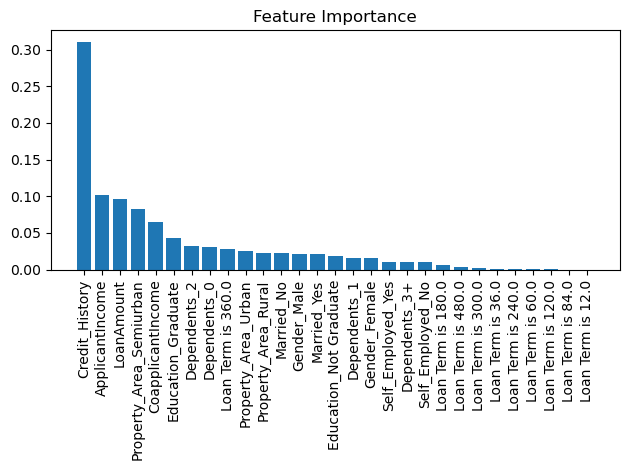%0A)

### While Credit History is the most \$\color{red}{\text {Important}}\$ in terms of feature selection for all decision Tree models and Random Forest, above \$\color{red}{\text {Applicant Income}}\$ is the second most important feature for Random Forest while \$\color{red}{\text {Education Status}}\$ is the second most important feature for Decision Tree respectively.<a
href="#While-Credit-History-is-the-most-$%5Ccolor%7Bred%7D%7B%5Ctext-%7BImportant%7D%7D$-in-terms-of-feature-selection-for-all--decision-Tree-models-and-Random-Forest,-above-$%5Ccolor%7Bred%7D%7B%5Ctext-%7BApplicant-Income%7D%7D$-is-the-second-most-important-feature-for-Random-Forest-while-$%5Ccolor%7Bred%7D%7B%5Ctext-%7BEducation-Status%7D%7D$-is-the-second-most-important-feature-for-Decision-Tree-respectively."
class="anchor-link">¶</a>

## \$\color{blue}{\text {Conclusion}}\$<a href="#$%5Ccolor%7Bblue%7D%7B%5Ctext-%7BConclusion%7D%7D$"
class="anchor-link">¶</a>

#### \$\color{red}{\text {EDA Analysis}}\$<a href="#$%5Ccolor%7Bred%7D%7B%5Ctext-%7BEDA-Analysis%7D%7D$"
class="anchor-link">¶</a>

##### 1)Males have a higher record for taking loans than female and loan approval to rejection Ratio for male is more than female respectively<a
href="#1)Males-have-a-higher-record-for-taking-loans-than-female-and-loan-approval-to-rejection-Ratio-for-male-is-more-than-female-respectively"
class="anchor-link">¶</a>

##### 2)Semi Urbans have a higher requirement in terms of Loan Access respectively<a
href="#2)Semi-Urbans-have-a-higher-requirement-in-terms-of-Loan-Access-respectively"
class="anchor-link">¶</a>

##### 3)if one calculates the yes to ratio for every column in the property area one can easily see people Living in the Semi Urban Areas had greater chances of Loan Approval than people living in both Urban and Rural Areas respectively<a
href="#3)if-one-calculates-the-yes-to-ratio-for-every-column-in-the-property-area-one-can-easily-see-people-Living-in-the-Semi-Urban-Areas-had-greater--chances-of-Loan-Approval-than-people-living-in-both-Urban-and-Rural-Areas-respectively"
class="anchor-link">¶</a>

##### 4)People who are not self employed takes higher loan than people who are<a
href="#4)People-who-are-not-self-employed-takes-higher-loan-than-people-who-are"
class="anchor-link">¶</a>

##### 5)Graduates has greater loan approval than non graduates indicating their ability to pay back by earning a job in future respectively<a
href="#5)Graduates-has-greater-loan-approval-than-non-graduates-indicating-their-ability-to-pay-back-by-earning-a-job-in-future-respectively"
class="anchor-link">¶</a>

##### 6)People who are married takes higher loan than people who are not and also have a higher property of Loan Approval as well<a
href="#6)People-who-are-married-takes-higher-loan-than-people-who-are-not-and-also-have-a-higher-property-of-Loan-Approval-as-well"
class="anchor-link">¶</a>

##### 7)People who have one or more than one dependent has a lower demand for Loan and a higher probability of Loan Approval as well<a
href="#7)People-who-have-one-or-more-than-one-dependent-has-a-lower-demand-for-Loan-and-a-higher-probability-of-Loan-Approval-as-well"
class="anchor-link">¶</a>

##### 8)People who are married have a higher amount of Average CoApplicant Income .However the most interesting thing is people married or Unmarried has a greater chance of Loan Rejection if their CoApplicant Income is high<a
href="#8)People-who-are-married-have-a-higher-amount-of-Average-CoApplicant-Income-.However-the-most-interesting-thing-is-people-married-or-Unmarried-has-a-greater-chance-of-Loan-Rejection-if-their-CoApplicant-Income-is-high"
class="anchor-link">¶</a>

##### 9)Though eventually unmarried people has higher amount of CoApplicant Income when CoApplicant Income is small, again people who are married have higher amount of Coapplicant Income than people who are not as the CoApplicant Income grows respectively<a
href="#9)Though-eventually-unmarried-people-has-higher-amount-of-CoApplicant-Income-when-CoApplicant-Income-is-small,-again-people-who-are-married-have-higher-amount-of-Coapplicant-Income-than-people-who-are-not-as-the-CoApplicant-Income-grows-respectively"
class="anchor-link">¶</a>

##### 10)as one can see a person who is married, with a bad credit score has higher CoApplicant Income while with people with a good credit score has a lower CoApplicant Income , something that might be a little counterintuitive but it might imply If Individuals have a bad credit score their wives must have Good Annual Income to pay it off when a default happens<a
href="#10)as-one-can-see-a-person-who-is-married,-with-a-bad-credit-score-has-higher-CoApplicant-Income-while-with-people-with-a-good-credit-score-has-a-lower-CoApplicant-Income-,-something-that-might-be-a-little-counterintuitive-but-it-might-imply-If-Individuals-have-a-bad-credit-score-their-wives-must-have-Good-Annual-Income-to-pay-it-off-when-a-default-happens"
class="anchor-link">¶</a>

#### \$\color{red}{\text {Best Model Selection}}\$<a href="#$%5Ccolor%7Bred%7D%7B%5Ctext-%7BBest-Model-Selection%7D%7D$"
class="anchor-link">¶</a>

##### Logistic Regression \$\color{blue}{\text {had the highest Accuracy Score - 80.48 %}}\$ followed by Random Forest \$\color{blue}{\text {80.13 %}}\$ , Thus for best model selection we did cross validation and under K Fold Cross Validation \$\color{blue}{\text {We finally chose Logistic Regression that had 80.48 % accuracy score}}\$<a
href="#Logistic-Regression-$%5Ccolor%7Bblue%7D%7B%5Ctext-%7Bhad-the-highest-Accuracy-Score---80.48-%25%7D%7D$--followed--by-Random-Forest-$%5Ccolor%7Bblue%7D%7B%5Ctext-%7B80.13-%25%7D%7D$-,-Thus-for-best-model-selection-we-did-cross-validation-and-under-K-Fold-Cross-Validation-$%5Ccolor%7Bblue%7D%7B%5Ctext-%7BWe-finally-chose-Logistic-Regression-that-had-80.48-%25-accuracy-score%7D%7D$"
class="anchor-link">¶</a>

#### \$\color{red}{\text {Feature Importance}}\$<a href="#$%5Ccolor%7Bred%7D%7B%5Ctext-%7BFeature-Importance%7D%7D$"
class="anchor-link">¶</a>

##### From Chi-Square Test Co-Applicant Income is the most important feature related with Loan Status ,While Credit History is the most \$\color{red}{\text {Important}}\$ in terms of feature selection for all decision Tree models and Random Forest, above \$\color{red}{\text {Applicant Income}}\$ is the second most important feature for Random Forest while \$\color{red}{\text {Education Status}}\$ is the second most important feature for Decision Tree respectively.<a
href="#From-Chi-Square-Test-Co-Applicant-Income-is-the-most-important-feature-related-with-Loan-Status-,While-Credit-History-is-the-most-$%5Ccolor%7Bred%7D%7B%5Ctext-%7BImportant%7D%7D$-in-terms-of-feature-selection-for-all--decision-Tree-models-and-Random-Forest,-above-$%5Ccolor%7Bred%7D%7B%5Ctext-%7BApplicant-Income%7D%7D$-is-the-second-most-important-feature-for-Random-Forest-while-$%5Ccolor%7Bred%7D%7B%5Ctext-%7BEducation-Status%7D%7D$-is-the-second-most-important-feature-for-Decision-Tree-respectively."
class="anchor-link">¶</a>

In \[ \]: